## Data exploration ##

In [1]:
# Load packages
library(mgcv)
library(ggplot2)
library(tidyverse)
library(lubridate)
library(gridExtra)
library(grid)
library(writexl)
library(magrittr)
library(rstatix)

Loading required package: nlme

This is mgcv 1.8-40. For overview type 'help("mgcv-package")'.

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.7     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::collapse() masks nlme::collapse()
x dplyr::filter()   masks stats::filter()
x dplyr::lag()      masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine



Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract




ERROR: Error in library(rstatix): there is no package called 'rstatix'


In [2]:
PATH <- file.path("C:/Users/julia/OneDrive - London School of Hygiene and Tropical Medicine/Documents/LSHTM/Project") #"/home/andewegs/1_RSV_scripts/"
setwd(PATH)
getwd()
rsv.data <- read_csv(file = "Data/infection_status.csv")

[1] "C:/Users/julia/OneDrive - London School of Hygiene and Tropical Medicine/Documents/LSHTM/Project"

Rows: 682 Columns: 23
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
dbl  (20): age_days, infection, IgG_PreF, IgA_PreF, IgG_PostF, IgA_PostF, Ig...
lgl   (1): IgA_Nn_household
date  (2): birthday, consultdate

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
head(rsv.data)

age_days,birthday,consultdate,infection,IgG_PreF,IgA_PreF,IgG_PostF,IgA_PostF,IgG_Ga,IgA_Ga,⋯,IgA_Nn_household,household04,household59,visitnursery_child,visitnursery_house,pregnancytime,contacttotal,contact04,contact59,sex
<dbl>,<date>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
676,2004-04-01,2006-02-06,1,0.3565,0.60,9.3264,0.08,0.260000,0.01,⋯,NA,NA,0,0,0,NA,3,1,0,2
600,2004-07-23,2006-03-15,1,772.3431,33.15,473.5323,14.52,3.130699,0.02,⋯,NA,1,0,1,0,NA,29,20,0,1
588,2004-08-09,2006-03-20,0,0.1800,0.03,0.2100,0.19,0.580000,0.03,⋯,NA,1,0,0,0,NA,4,1,0,2
591,2004-08-06,2006-03-20,1,740.2907,70.38,466.2055,49.78,1.886910,0.05,⋯,NA,1,1,0,0,NA,2,0,0,2
1184,2002-12-29,2006-03-27,1,1999.2353,NA,1459.5921,NA,55.896003,NA,⋯,NA,1,1,0,0,NA,6,2,3,1
686,2004-05-12,2006-03-29,1,807.2200,NA,838.7400,NA,15.000000,NA,⋯,NA,1,0,0,0,NA,2,0,0,2


In [4]:
#get number of children
nrow(rsv.data)

[1] 682

In [5]:
#count total missing values in each column of data frame
sapply(rsv.data, function(x) sum(is.na(x)))

age_days           birthday        consultdate          infection 
                 0                  0                  0                  0 
          IgG_PreF           IgA_PreF          IgG_PostF          IgA_PostF 
                 0                185                  0                185 
            IgG_Ga             IgA_Ga             IgG_Gb             IgA_Gb 
                 0                185                  0                185 
             IgG_N   IgA_Nn_household        household04        household59 
                 0                682                 61                  0 
visitnursery_child visitnursery_house      pregnancytime       contacttotal 
                22                 30                400                 96 
         contact04          contact59                sex 
               178                178                  0

In [7]:
get_summary_stats(rsv.data, show = c("n", "min", "max", "median", "mean", "sd"))

variable,n,min,max,median,mean,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age_days,682,36.000,1854.00,345.000,537.837,454.629
contact04,504,0.000,40.00,1.000,3.107,5.423
contact59,504,0.000,50.00,0.000,1.212,3.941
contacttotal,586,0.000,200.00,5.000,8.718,14.406
household04,621,1.000,3.00,1.000,1.467,0.610
household59,682,0.000,3.00,0.000,0.350,0.654
IgA_Ga,497,0.010,7.22,0.020,0.063,0.353
IgA_Gb,497,0.010,18.30,0.020,0.100,0.860
IgA_PostF,497,0.010,350.00,0.080,2.316,16.361


In [3]:
rsv.data <- rsv.data %>%
  # Get day of the year of birthday (= number between 1 and 365)
  mutate(
    Birth_doy = birthday %>% yday()
  ) %>%
  # Alter number of housefold members 1 == no siblings, >1 == having siblings
  mutate(
    household04_counts = case_when(
      age_days/365 >= 5 ~ (household04 + 1),  #because the child itself is also included in household size
      age_days/365 < 5 ~ household04)       #the household04 of children of age 5 should also include the child itself
  ) %>%
  # Make number of siblings 0-4 years binary factor variable
  mutate(
    Siblings04 = case_when(
      household04_counts <= 1 ~ 'False',
      household04_counts > 1 ~ 'True'
    ) %>% 
      factor()
  ) %>%
  # Make number of siblings 5-9 years binary factor variable
  mutate(
    Siblings59 = case_when(
      household59 <= 0 ~ 'False',
      household59 > 0 ~ 'True'
    ) %>% 
      factor()
  ) %>% 
  # Set nursery 0 1 to False True
  mutate(
    Nursery = case_when(
      visitnursery_child == 0 ~ 'False',
      visitnursery_child == 1 ~ 'True'
    ) %>% 
      factor()
  )

In [11]:
nrow(rsv.data)

[1] 682

In [14]:
completeVec <- complete.cases(rsv.data[, c("Siblings04", "Nursery")]) ##keeps participants with complete records of Siblings and Nursery only
complete.rsv.data <- rsv.data[completeVec,]
nrow(complete.rsv.data)

[1] 616

In [44]:
print(complete.rsv.data$birthday[10:20])


 [1] "2002-10-13" "2003-08-22" "2004-09-20" "2004-02-25" "2004-09-03"
 [6] "2002-06-04" "2003-08-25" "2002-12-04" "2001-05-07" "2002-06-03"
[11] "2001-04-24"


In [31]:
print(rsv.data$birthday[1])

[1] "2004-04-01"


## Baseline distribution ##

In [4]:
rsv.data <- rsv.data %>%
 mutate(
    Birth_mo = birthday %>% month()
  )

In [5]:
season_border = "10-01" #MM-DD
spring <- c(3, 4, 5)
summer <- c(6, 7, 8)
autumn <- c (9, 10, 11)
winter <- c(1, 2, 12)
rsv.data <- rsv.data %>%
  mutate(
    age_years = case_when(
      age_days <= 365 ~ '0-1 year',
      age_days > 365 & age_days <= 730 ~ '1-2 years',
      age_days > 730 & age_days <= 1095 ~ '2-3 years',
      age_days > 1095 & age_days <= 1460 ~ '3-4 years',
      age_days > 1460 ~ '5 years'
    ) %>% 
      factor()
    ) %>%
  mutate(
   seasons = case_when(
    consultdate < paste("2006-", season_border, sep = "")  ~ "2005/2006", 
    (consultdate >= paste("2006-", season_border, sep = "") &  consultdate < "2010-01-01") ~ "2006/2007",
    (consultdate >= "2010-01-01" &  consultdate < paste("2016-", season_border, sep = "")) ~ "2015/2016",
    consultdate >= paste("2016-", season_border, sep = "")  ~ "2016/2017")
  ) %>% 
  # Variable for the two cohorts
  mutate(
    cohort = if_else(seasons == "2005/2006" | seasons == "2006/2007", "2006/2007", "2016/2017")
      )%>%
    mutate(
        season_birth = case_when(
            Birth_mo %in% spring ~ "Spring",
            Birth_mo %in% summer ~ "Summer",
            Birth_mo %in% autumn ~ "Autumn",
            Birth_mo %in% winter ~ "Winter")
        ) %>%
  mutate(
    nursery_house = case_when(
      visitnursery_house <= 0 ~ 'False',
      visitnursery_house > 0 ~ 'True'
    ) %>% 
      factor()
    )%>%
    mutate(
        pre_term = case_when(
            pregnancytime < 37.0 ~ 'True',
            pregnancytime >= 37.0 ~ 'False'
            ) %>%
            factor()
        )
head(rsv.data)


age_days,birthday,consultdate,infection,IgG_PreF,IgA_PreF,IgG_PostF,IgA_PostF,IgG_Ga,IgA_Ga,⋯,Siblings04,Siblings59,Nursery,Birth_mo,age_years,seasons,cohort,season_birth,nursery_house,pre_term
<dbl>,<date>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<fct>,<dbl>,<fct>,<chr>,<chr>,<chr>,<fct>,<fct>
676,2004-04-01,2006-02-06,1,0.3565,0.60,9.3264,0.08,0.260000,0.01,⋯,NA,False,False,4,1-2 years,2005/2006,2006/2007,Spring,False,NA
600,2004-07-23,2006-03-15,1,772.3431,33.15,473.5323,14.52,3.130699,0.02,⋯,False,False,True,7,1-2 years,2005/2006,2006/2007,Summer,False,NA
588,2004-08-09,2006-03-20,0,0.1800,0.03,0.2100,0.19,0.580000,0.03,⋯,False,False,False,8,1-2 years,2005/2006,2006/2007,Summer,False,NA
591,2004-08-06,2006-03-20,1,740.2907,70.38,466.2055,49.78,1.886910,0.05,⋯,False,True,False,8,1-2 years,2005/2006,2006/2007,Summer,False,NA
1184,2002-12-29,2006-03-27,1,1999.2353,NA,1459.5921,NA,55.896003,NA,⋯,False,True,False,12,3-4 years,2005/2006,2006/2007,Winter,False,NA
686,2004-05-12,2006-03-29,1,807.2200,NA,838.7400,NA,15.000000,NA,⋯,False,False,False,5,1-2 years,2005/2006,2006/2007,Spring,False,NA


In [6]:
rsv.data <- rsv.data %>%
 mutate(
    total_cont = case_when(
        contacttotal == 0 ~ '0',
        contacttotal >= 1 & contacttotal <= 2 ~ '1-2',
        contacttotal >= 3 & contacttotal <= 5 ~ '3-5',
        contacttotal >= 6 & contacttotal <= 10 ~ '6-10',
        contacttotal >= 11 & contacttotal <= 20 ~ '11-20',
        contacttotal >= 21 & contacttotal <= 50 ~ '21-50',
        contacttotal > 50  ~ '50+'
  )
)

In [12]:
rsv.data %$% table(contacttotal, total_cont, useNA = "ifany")

            total_cont
contacttotal  0 1-2 11-20 21-50 3-5 50+ 6-10 <NA>
        0    84   0     0     0   0   0    0    0
        1     0  31     0     0   0   0    0    0
        2     0  57     0     0   0   0    0    0
        3     0   0     0     0  45   0    0    0
        4     0   0     0     0  50   0    0    0
        5     0   0     0     0  42   0    0    0
        6     0   0     0     0   0   0   43    0
        7     0   0     0     0   0   0   27    0
        8     0   0     0     0   0   0   21    0
        9     0   0     0     0   0   0   26    0
        10    0   0     0     0   0   0   22    0
        11    0   0    10     0   0   0    0    0
        12    0   0    20     0   0   0    0    0
        13    0   0    12     0   0   0    0    0
        14    0   0    15     0   0   0    0    0
        15    0   0     5     0   0   0    0    0
        16    0   0     2     0   0   0    0    0
        17    0   0     6     0   0   0    0    0
        18    0   0     6  

In [7]:
rsv.data <- rsv.data %>%
 mutate(
    total_cont04 = case_when(
        contact04 == 0 ~ '0',
        contact04 >= 1 & contact04 <= 2 ~ '1-2',
        contact04 >= 3 & contact04 <= 5 ~ '3-5',
        contact04 >= 6 & contact04 <= 10 ~ '6-10',
        contact04 >= 11 & contact04 <= 20 ~ '11-20',
        contact04 >= 21 & contact04 <= 40 ~ '21-40'
  )
)

In [14]:
rsv.data %$% table(contact04, total_cont04, useNA = "ifany")

         total_cont04
contact04   0 1-2 11-20 21-40 3-5 6-10 <NA>
     0    213   0     0     0   0    0    0
     1      0  92     0     0   0    0    0
     2      0  51     0     0   0    0    0
     3      0   0     0     0  29    0    0
     4      0   0     0     0  14    0    0
     5      0   0     0     0  14    0    0
     6      0   0     0     0   0    8    0
     7      0   0     0     0   0    7    0
     8      0   0     0     0   0   13    0
     9      0   0     0     0   0    2    0
     10     0   0     0     0   0   21    0
     11     0   0     1     0   0    0    0
     12     0   0     8     0   0    0    0
     14     0   0     3     0   0    0    0
     15     0   0     6     0   0    0    0
     16     0   0     1     0   0    0    0
     17     0   0     1     0   0    0    0
     18     0   0     2     0   0    0    0
     20     0   0    10     0   0    0    0
     22     0   0     0     2   0    0    0
     25     0   0     0     1   0    0    0
     26   

In [8]:
rsv.data <- rsv.data %>%
 mutate(
    total_cont59 = case_when(
        contact59 == 0 ~ '0',
        contact59 >= 1 & contact59 <= 2 ~ '1-2',
        contact59 >= 3 & contact59 <= 5 ~ '3-5',
        contact59 >= 6 & contact59 <= 10 ~ '6-10',
        contact59 >= 11 & contact59 <= 20 ~ '11-20',
        contact59 >= 21 & contact59 <= 50 ~ '21-50'
  )
)

In [17]:
rsv.data %$% table(contact59, total_cont59, useNA = "ifany")

         total_cont59
contact59   0 1-2 11-20 21-50 3-5 6-10 <NA>
     0    352   0     0     0   0    0    0
     1      0  60     0     0   0    0    0
     2      0  36     0     0   0    0    0
     3      0   0     0     0  10    0    0
     4      0   0     0     0  17    0    0
     5      0   0     0     0   6    0    0
     6      0   0     0     0   0    5    0
     7      0   0     0     0   0    3    0
     9      0   0     0     0   0    1    0
     10     0   0     0     0   0    2    0
     13     0   0     1     0   0    0    0
     14     0   0     1     0   0    0    0
     15     0   0     1     0   0    0    0
     17     0   0     1     0   0    0    0
     18     0   0     1     0   0    0    0
     20     0   0     2     0   0    0    0
     24     0   0     0     1   0    0    0
     25     0   0     0     2   0    0    0
     30     0   0     0     1   0    0    0
     50     0   0     0     1   0    0    0
     <NA>   0   0     0     0   0    0  178

In [18]:
rsv.data %$% table(age_years, useNA = "ifany")

age_years
 0-1 year 1-2 years 2-3 years 3-4 years   5 years 
      369       143        73        55        42 

In [19]:
rsv.data %$% table(season_birth, useNA = "ifany")

season_birth
Autumn Spring Summer Winter 
   173    174    182    153 

In [20]:
rsv.data %$% table(cohort, useNA = "ifany")

cohort
2006/2007 2016/2017 
      357       325 

In [21]:
rsv.data %$% table(Siblings04, useNA = "ifany")

Siblings04
False  True  <NA> 
  367   254    61 

In [22]:
rsv.data %$% table(Siblings59, useNA = "ifany")

Siblings59
False  True 
  502   180 

In [23]:
rsv.data %$% table(Nursery, useNA = "ifany")

Nursery
False  True  <NA> 
  391   269    22 

In [24]:
rsv.data %$% table(nursery_house, useNA = "ifany")

nursery_house
False  True  <NA> 
  465   187    30 

In [25]:
rsv.data %$% table(pre_term, useNA = "ifany")

pre_term
False  True  <NA> 
  270    12   400 

In [26]:
rsv.data %$% table(sex, useNA = "ifany")

sex
  1   2 
353 329 

In [27]:
rsv.data %$% table(total_cont, useNA = "ifany")

total_cont
    0   1-2 11-20 21-50   3-5   50+  6-10  <NA> 
   84    88    81    47   137    10   139    96 

In [28]:
rsv.data %$% table(total_cont04, useNA = "ifany")

total_cont04
    0   1-2 11-20 21-40   3-5  6-10  <NA> 
  213   143    32     8    57    51   178 

In [29]:
rsv.data %$% table(total_cont59, useNA = "ifany")

total_cont59
    0   1-2 11-20 21-50   3-5  6-10  <NA> 
  352    96     7     5    33    11   178 

In [9]:
rsv.data <- rsv.data %>%
  # Get age at consultation (in days)
  mutate(
    age_at_consul_mo = age_days/30.44 #average month has 30.44 days
  )
head(rsv.data)

age_days,birthday,consultdate,infection,IgG_PreF,IgA_PreF,IgG_PostF,IgA_PostF,IgG_Ga,IgA_Ga,⋯,age_years,seasons,cohort,season_birth,nursery_house,pre_term,total_cont,total_cont04,total_cont59,age_at_consul_mo
<dbl>,<date>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<chr>,<chr>,<dbl>
676,2004-04-01,2006-02-06,1,0.3565,0.60,9.3264,0.08,0.260000,0.01,⋯,1-2 years,2005/2006,2006/2007,Spring,False,NA,3-5,1-2,0,22.20762
600,2004-07-23,2006-03-15,1,772.3431,33.15,473.5323,14.52,3.130699,0.02,⋯,1-2 years,2005/2006,2006/2007,Summer,False,NA,21-50,11-20,0,19.71091
588,2004-08-09,2006-03-20,0,0.1800,0.03,0.2100,0.19,0.580000,0.03,⋯,1-2 years,2005/2006,2006/2007,Summer,False,NA,3-5,1-2,0,19.31669
591,2004-08-06,2006-03-20,1,740.2907,70.38,466.2055,49.78,1.886910,0.05,⋯,1-2 years,2005/2006,2006/2007,Summer,False,NA,1-2,0,0,19.41524
1184,2002-12-29,2006-03-27,1,1999.2353,NA,1459.5921,NA,55.896003,NA,⋯,3-4 years,2005/2006,2006/2007,Winter,False,NA,6-10,1-2,3-5,38.89619
686,2004-05-12,2006-03-29,1,807.2200,NA,838.7400,NA,15.000000,NA,⋯,1-2 years,2005/2006,2006/2007,Spring,False,NA,1-2,0,0,22.53614


In [11]:
summary(rsv.data$age_days)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   36.0   207.2   345.0   537.8   728.0  1854.0 

In [15]:
rsv.data %$% table(infection, useNA = "ifany")

infection
  0   1 
337 345 

**Infection by age and season of birth**

,values,infected
,<chr>,<dbl>
0-1 year,0-1 year,0.2032520
1-2 years,1-2 years,0.7202797
2-3 years,2-3 years,0.9589041
3-4 years,3-4 years,1.0000000
5 years,5 years,1.0000000


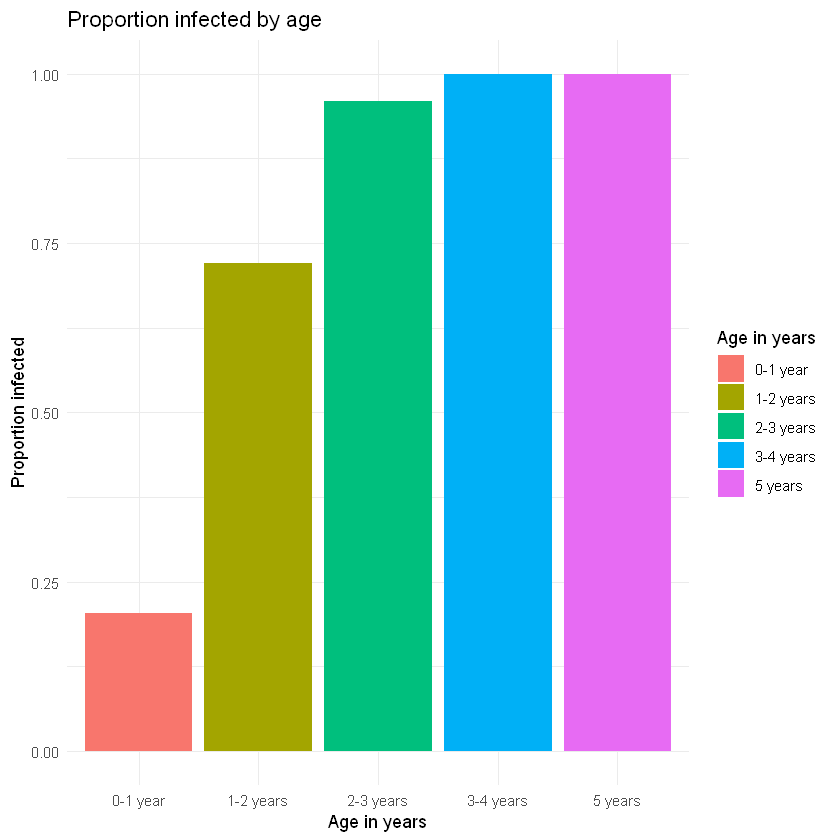

In [62]:
tab <- table(rsv.data$age_years, rsv.data$infection)
ptab <- prop.table(tab, margin=1)
dframe <- data.frame(values=rownames(tab), infected=ptab[,2])
dframe
#png("infection_by_age.png")
p<-ggplot(data=dframe, aes(x=values, y=infected, fill = values)) +
  geom_bar(stat="identity")+
  theme_minimal()+
  labs(title="Proportion infected by age",
        x ="Age in years", y = "Proportion infected") + scale_fill_discrete(name="Age in years")
p
#dev.off()

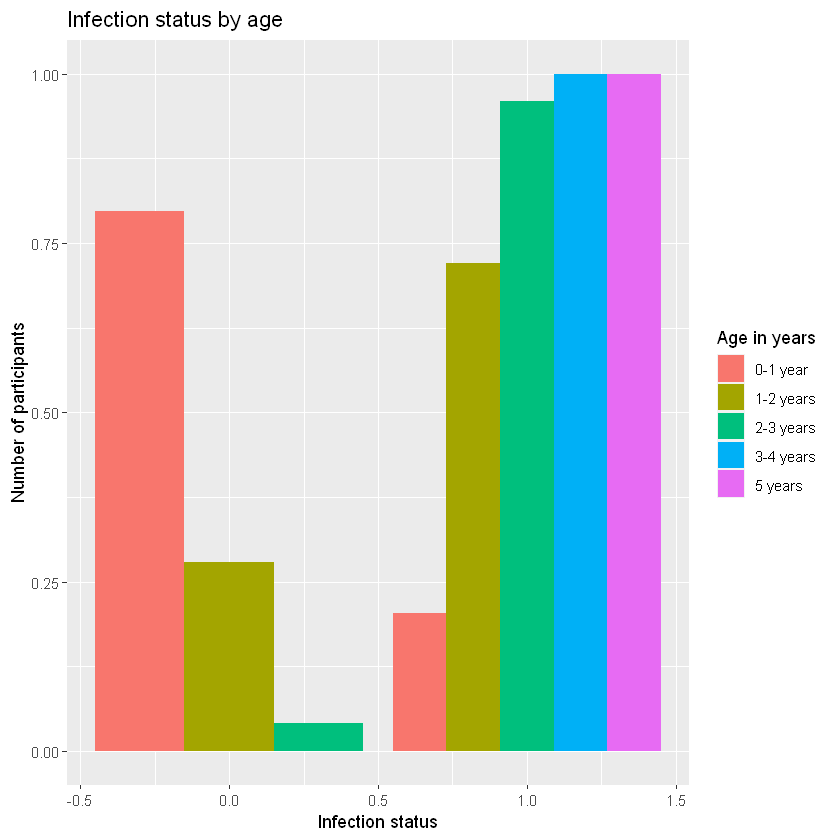

In [89]:
#png("infection_by_age.png")
ggplot(rsv.data, aes(x = infection, y=..prop.., fill=age_years)) + geom_bar(position="dodge") +
labs(title="Infection status by age",
        x ="Infection status", y = "Number of participants") + scale_fill_discrete(name="Age in years")
#dev.off()

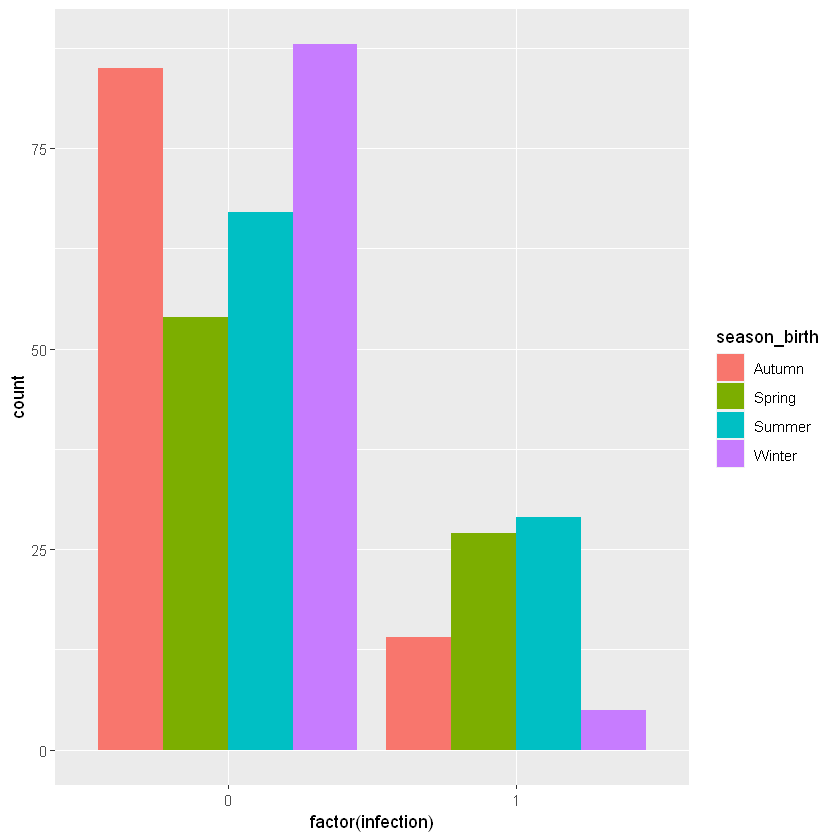

In [63]:
zero_one <- rsv.data%>%filter(age_years == '0-1 year')
zero_one%>%
  ggplot(aes(x = factor(infection),fill = season_birth)) + 
  geom_bar(position="dodge")

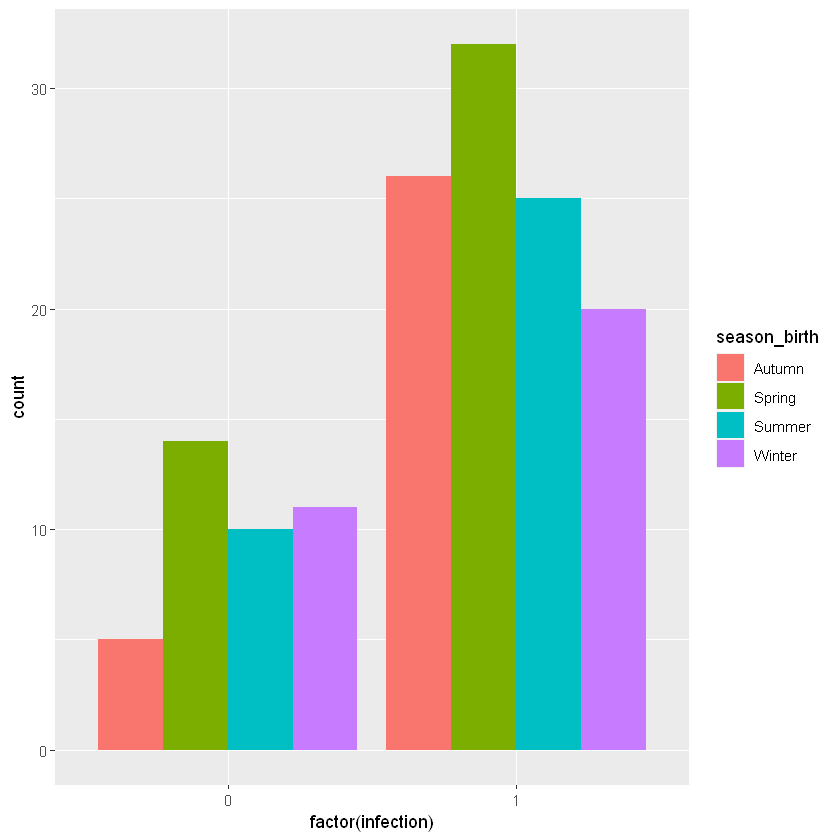

In [66]:
one_two <- rsv.data%>%filter(age_years == '1-2 years')
one_two%>%
  ggplot(aes(x = factor(infection),fill = season_birth)) + 
  geom_bar(position="dodge")

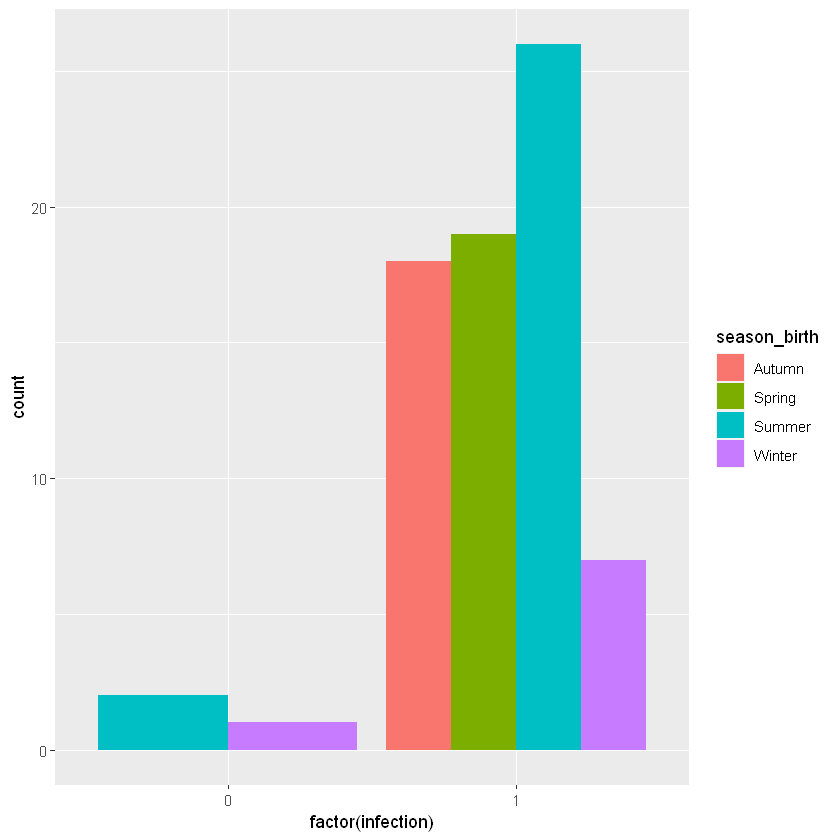

In [65]:
two_three <- rsv.data%>%filter(age_years == '2-3 years')
two_three%>%
  ggplot(aes(x = factor(infection),fill = season_birth)) + 
  geom_bar(position="dodge")

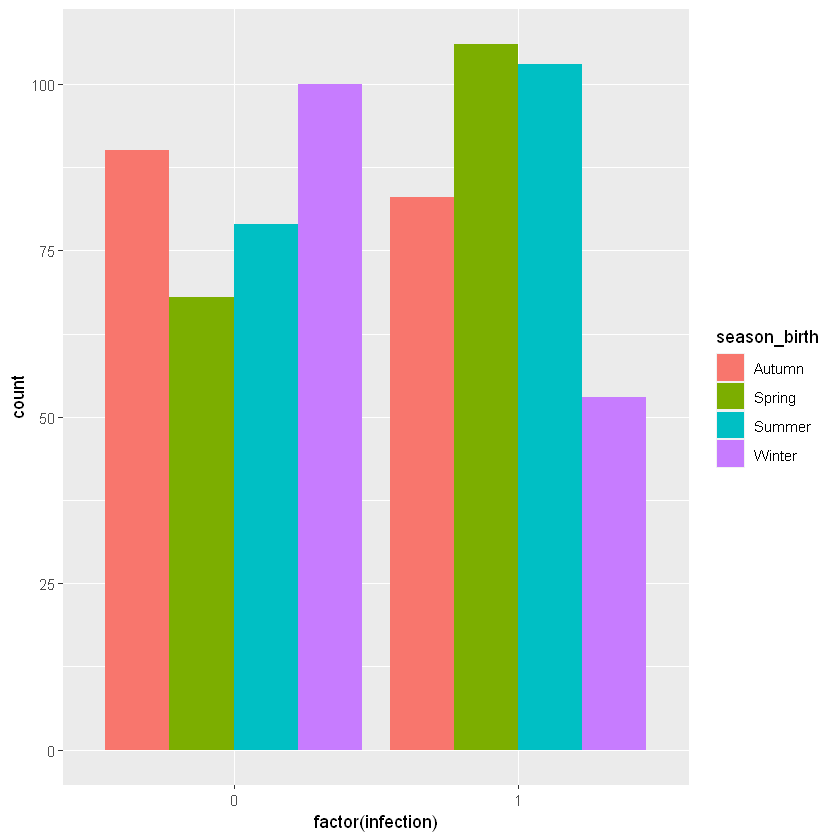

In [57]:
rsv.data %>% 
  ggplot(aes(x = factor(infection),fill = season_birth)) + 
  geom_bar(position="dodge")

,values,infected
,<chr>,<dbl>
Autumn,Autumn,0.4797688
Spring,Spring,0.6091954
Summer,Summer,0.5659341
Winter,Winter,0.3464052


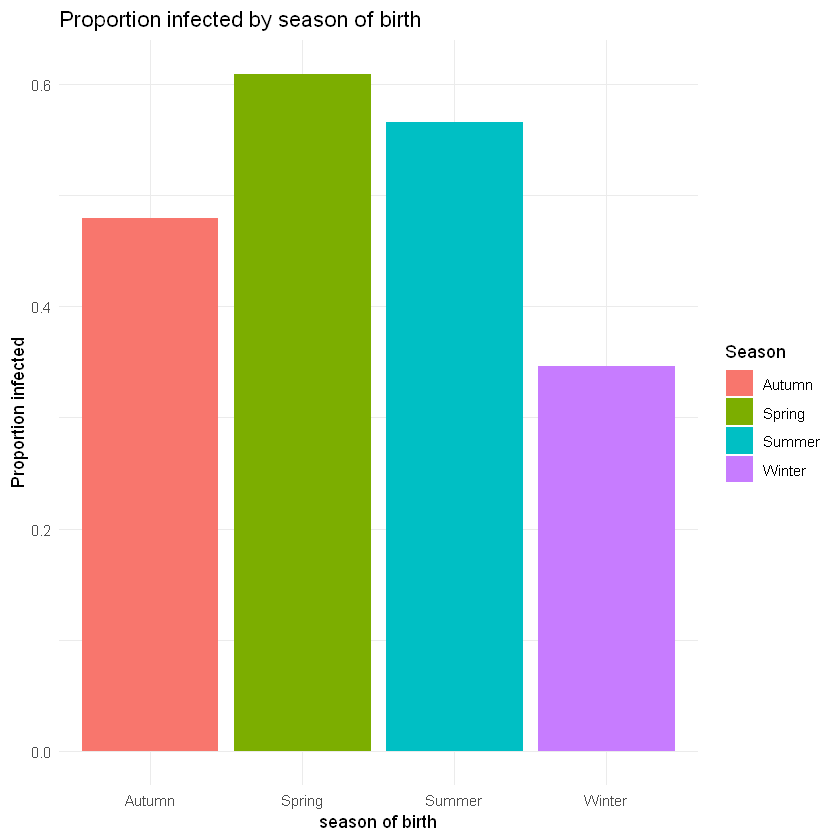

In [68]:
tab <- table(rsv.data$season_birth, rsv.data$infection)
ptab <- prop.table(tab, margin=1)
dframe <- data.frame(values=rownames(tab), infected=ptab[,2])
dframe
#png("infection_by_season.png")
p<-ggplot(data=dframe, aes(x=values, y=infected, fill = values)) +
  geom_bar(stat="identity")+
  theme_minimal()+
  labs(title="Proportion infected by season of birth",
        x ="season of birth", y = "Proportion infected") + scale_fill_discrete(name="Season")
p
#dev.off()

**Ig Distribution by age**

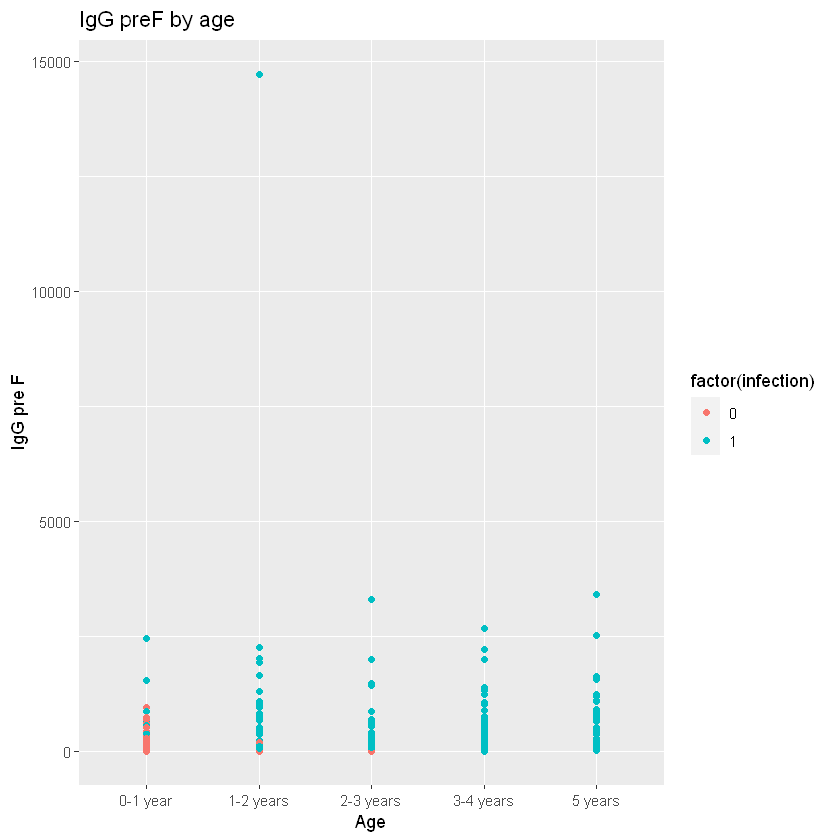

In [20]:
ggplot(rsv.data, aes(x = age_years, y=IgG_PreF)) + geom_point(aes(color = factor(infection))) +
labs(title="IgG preF by age",
        x ="Age", y = "IgG pre F")

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."


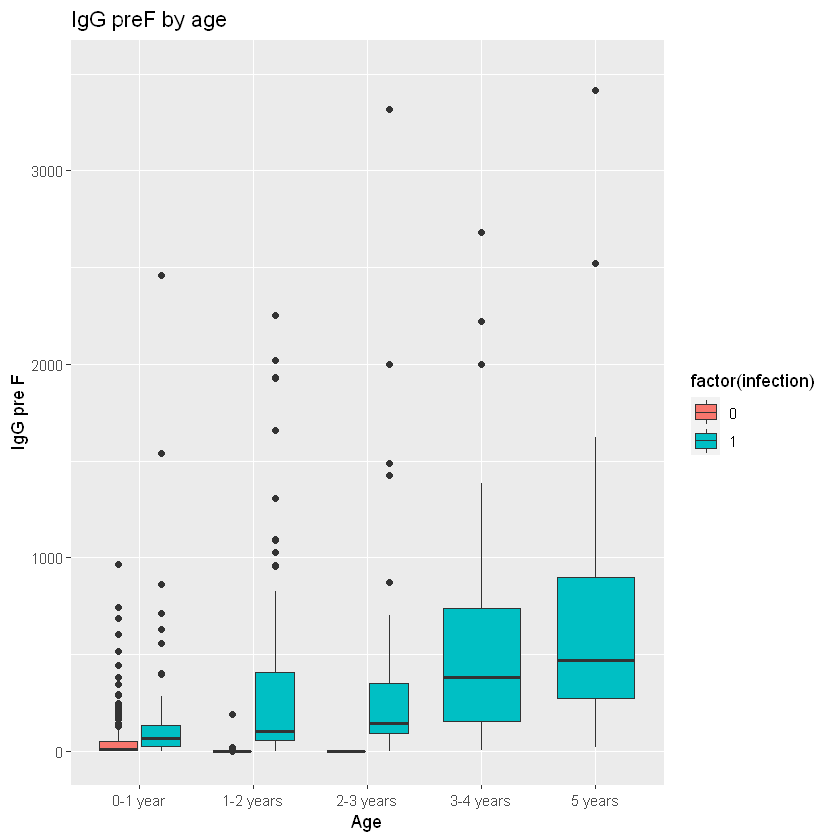

In [31]:
ggplot(rsv.data,aes(x=age_years,y=IgG_PreF,fill=factor(infection)))+geom_boxplot()+
labs(title="IgG preF by age",
        x ="Age", y = "IgG pre F") +
ylim(0,3500)

Warning message:
"Removed 187 rows containing non-finite values (stat_boxplot)."


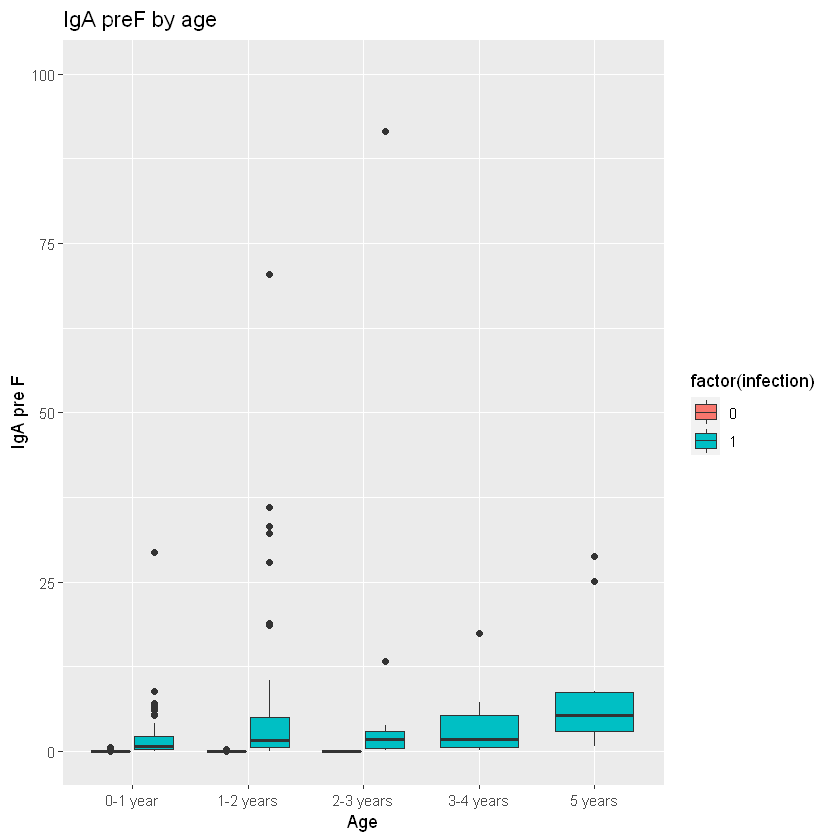

In [33]:
ggplot(rsv.data,aes(x=age_years,y=IgA_PreF,fill=factor(infection)))+geom_boxplot()+
labs(title="IgA preF by age",
        x ="Age", y = "IgA pre F") +
ylim(0, 100)

Warning message:
"Removed 28 rows containing non-finite values (stat_boxplot)."


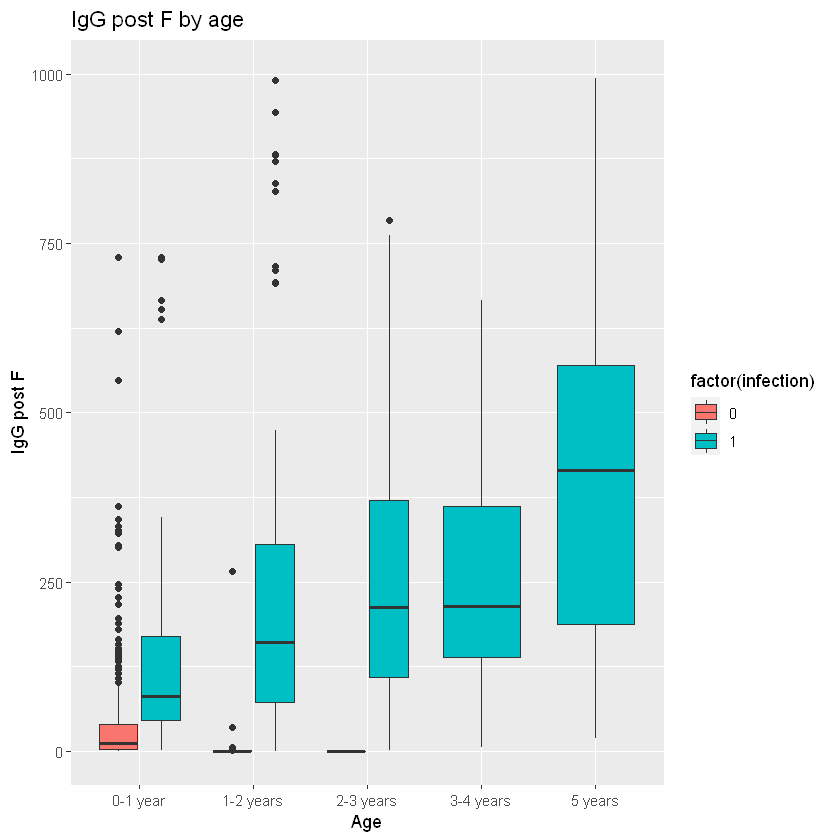

In [34]:
ggplot(rsv.data,aes(x=age_years,y=IgG_PostF,fill=factor(infection)))+geom_boxplot()+
labs(title="IgG post F by age",
        x ="Age", y = "IgG post F") +
ylim(0, 1000)

Warning message:
"Removed 186 rows containing non-finite values (stat_boxplot)."


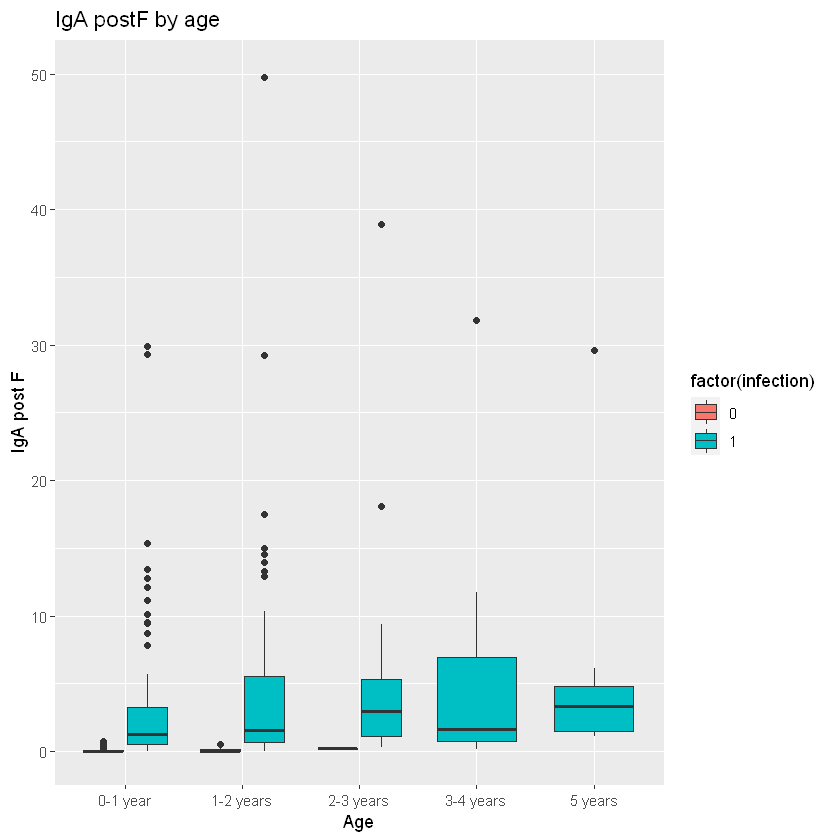

In [37]:
ggplot(rsv.data,aes(x=age_years,y=IgA_PostF,fill=factor(infection)))+geom_boxplot()+
labs(title="IgA postF by age",
        x ="Age", y = "IgA post F") +
ylim (0,50)

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."


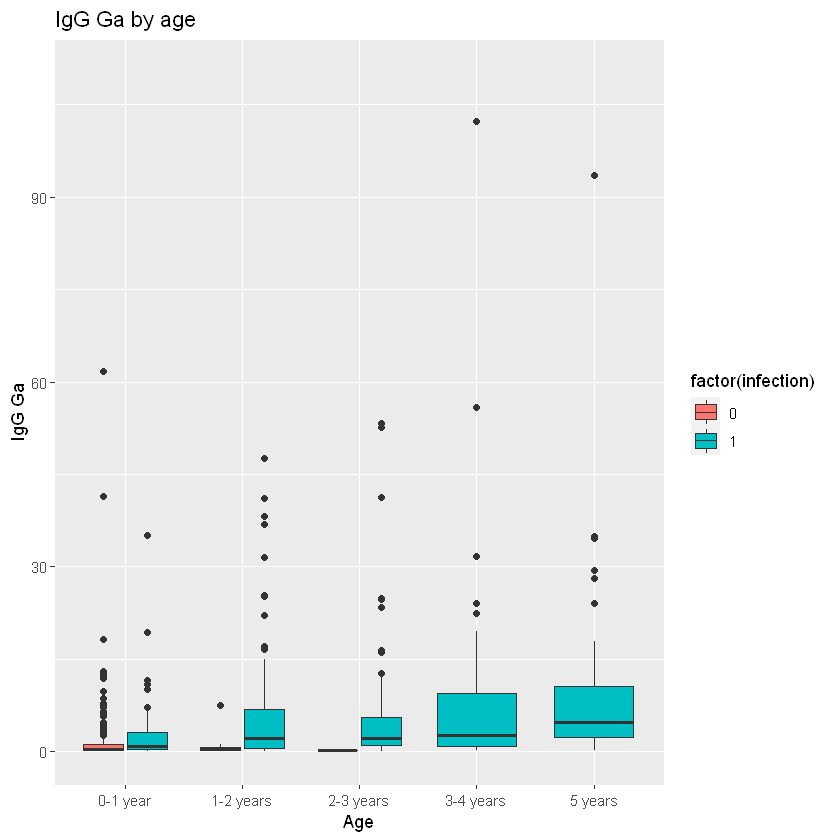

In [39]:
ggplot(rsv.data,aes(x=age_years,y=IgG_Ga,fill=factor(infection)))+geom_boxplot()+
labs(title="IgG Ga by age",
        x ="Age", y = "IgG Ga") +
ylim (0, 110)

Warning message:
"Removed 187 rows containing non-finite values (stat_boxplot)."


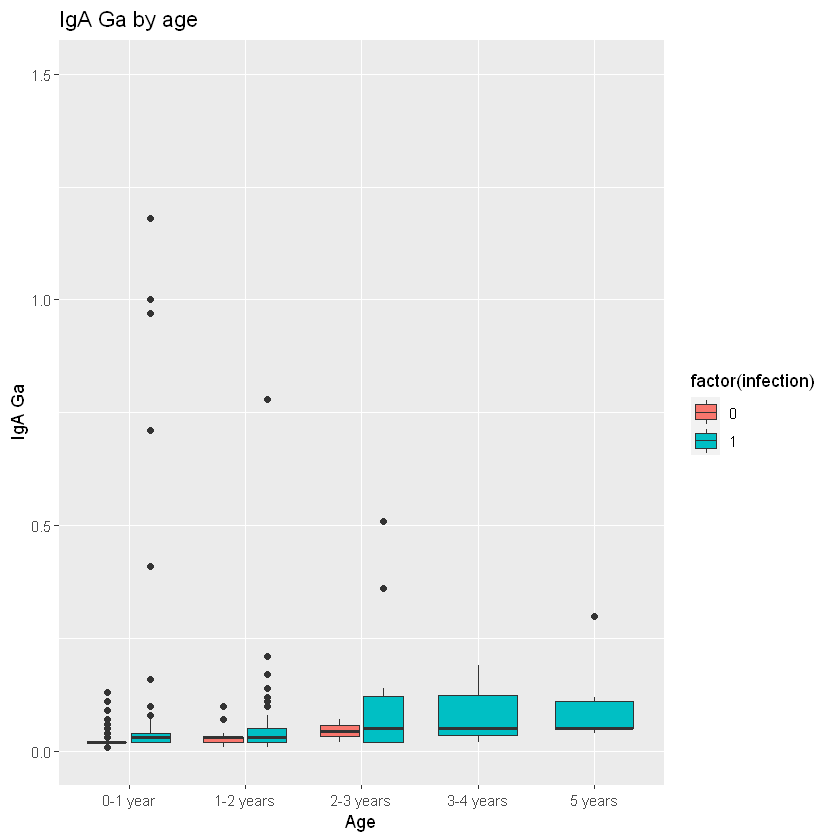

In [41]:
ggplot(rsv.data,aes(x=age_years,y=IgA_Ga,fill=factor(infection)))+geom_boxplot()+
labs(title="IgA Ga by age",
        x ="Age", y = "IgA Ga") +
ylim (0,1.5)

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."


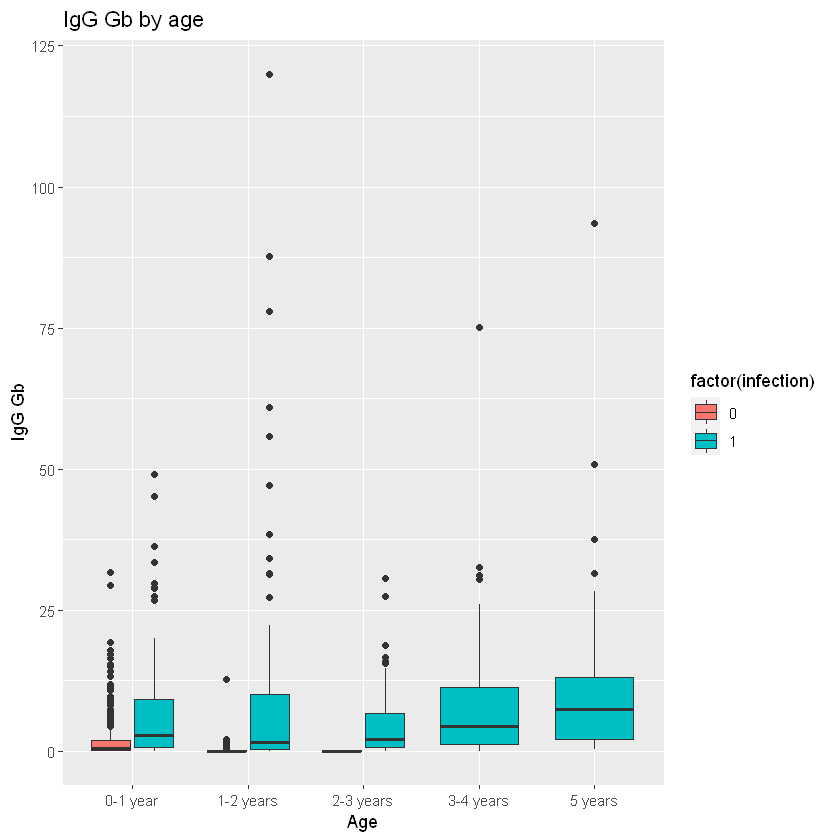

In [42]:
ggplot(rsv.data,aes(x=age_years,y=IgG_Gb,fill=factor(infection)))+geom_boxplot()+
labs(title="IgG Gb by age",
        x ="Age", y = "IgG Gb") +
ylim (0,120)

Warning message:
"Removed 186 rows containing non-finite values (stat_boxplot)."


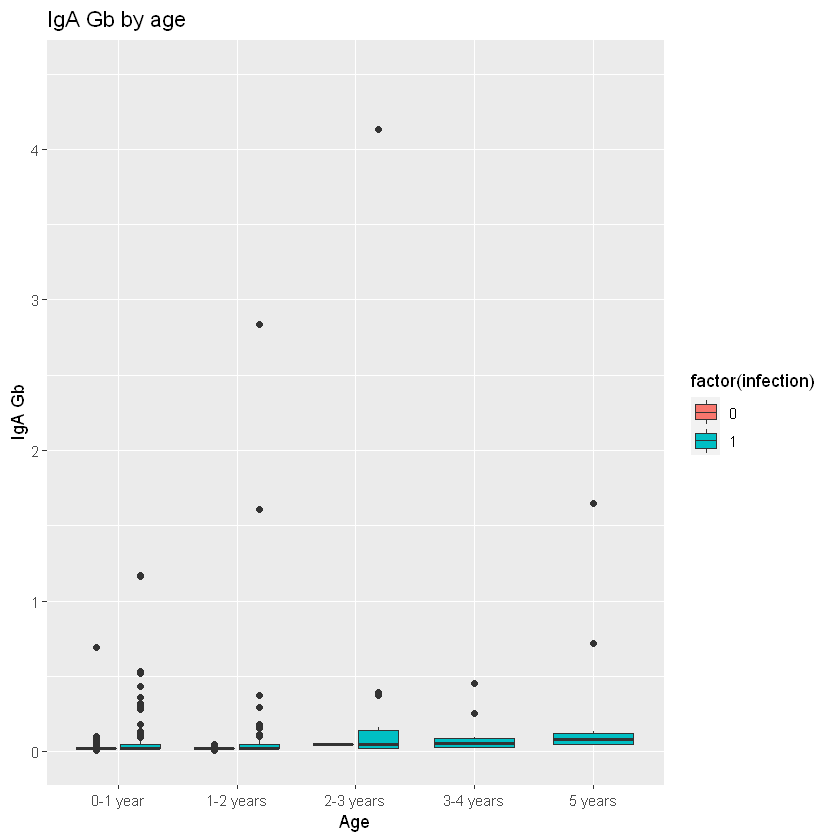

In [44]:
ggplot(rsv.data,aes(x=age_years,y=IgA_Gb,fill=factor(infection)))+geom_boxplot()+
labs(title="IgA Gb by age",
        x ="Age", y = "IgA Gb") +
ylim (0,4.5)

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."


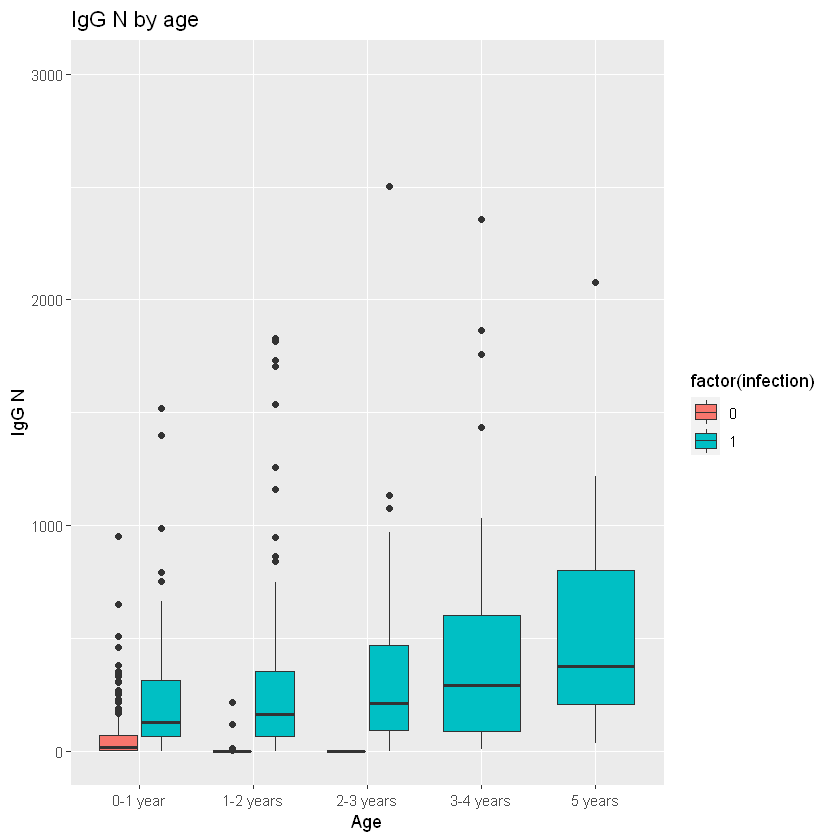

In [45]:
ggplot(rsv.data,aes(x=age_years,y=IgG_N,fill=factor(infection)))+geom_boxplot()+
labs(title="IgG N by age",
        x ="Age", y = "IgG N") +
ylim (0, 3000)

**Number of contacts by age**

***Total contacts***

Warning message:
"Removed 98 rows containing missing values (geom_point)."


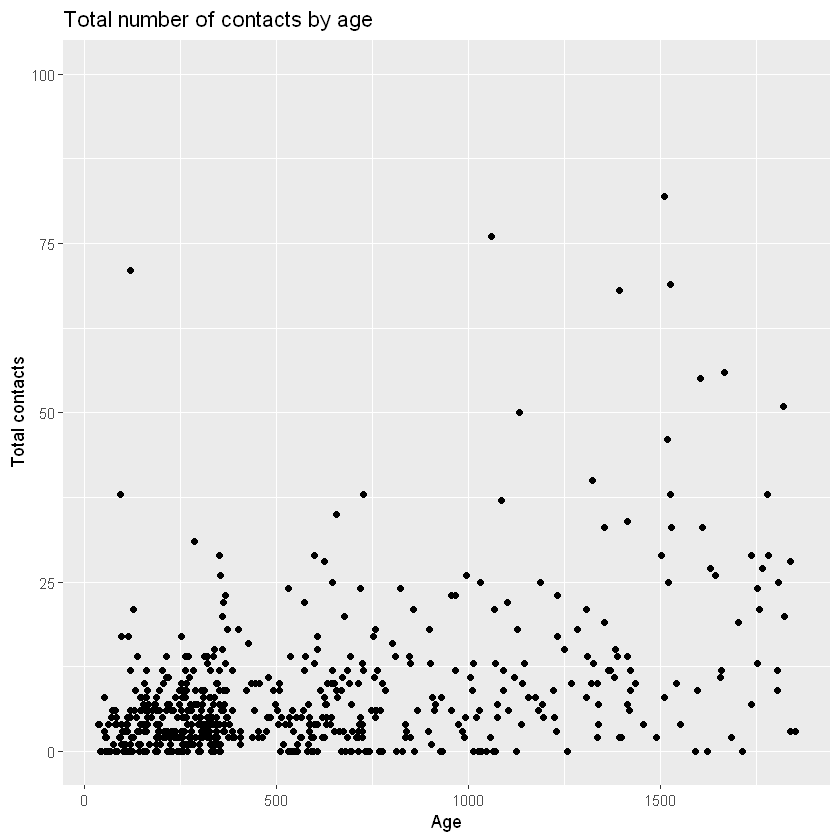

In [14]:
ggplot(rsv.data, aes(x = age_days, y = contacttotal)) +
    geom_point() +
labs(title="Total number of contacts by age",
        x ="Age", y = "Total contacts") +
ylim (0, 100)

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 98 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 98 rows containing missing values (geom_point)."


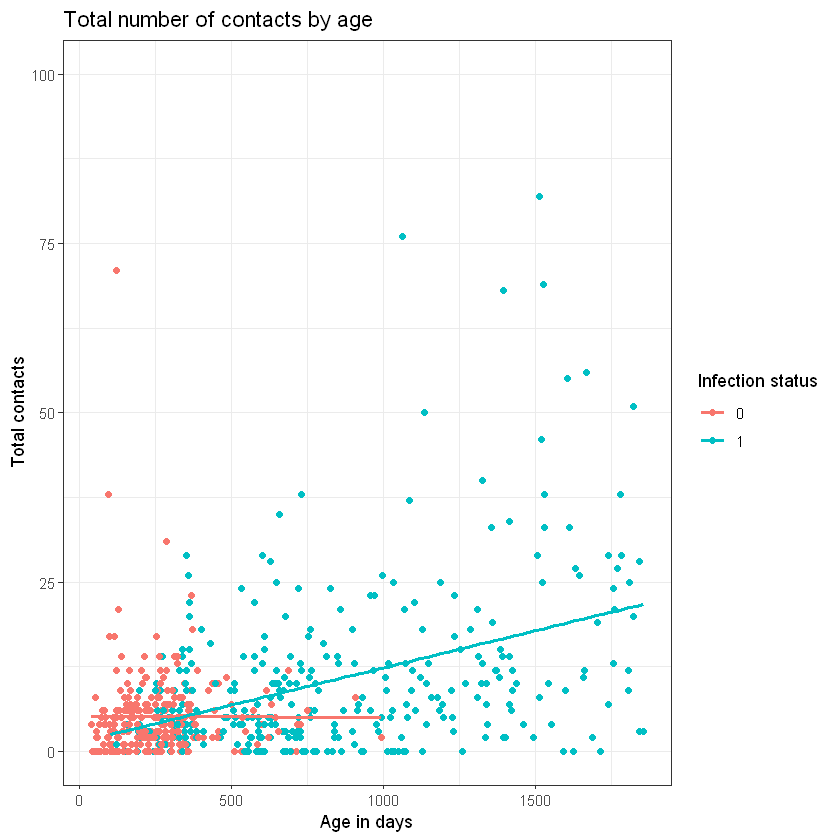

In [35]:
#png("contacts_by_age.png")
rsv.data %>% 
  ggplot(aes(x = age_days, y = contacttotal, color = factor(infection))) + 
  geom_point() +
  geom_smooth(method = lm, se = F) +
  theme_bw() +
  ylim (0, 100) +
labs(title="Total number of contacts by age",
        x ="Age in days", y = "Total contacts", color = "Infection status") 
#dev.off()

In [41]:
summ_contact <- rsv.data %>% 
filter(complete.cases(contacttotal)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contacttotal),
                  median = median(contacttotal),
                  sd = sd(contacttotal),
                  min = min(contacttotal),
                  max = max(contacttotal))
summ_contact

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-1 year,5.243902,4.0,6.520255,0,71
1-2 years,8.253731,5.0,14.288481,0,150
2-3 years,9.125000,6.0,11.323586,0,76
3-4 years,17.094340,10.0,28.466082,0,200
5 years,23.375000,22.5,19.636031,0,82


In [46]:
write.csv(summ_contact, "total_contacts_by_age.csv", row.names = FALSE)

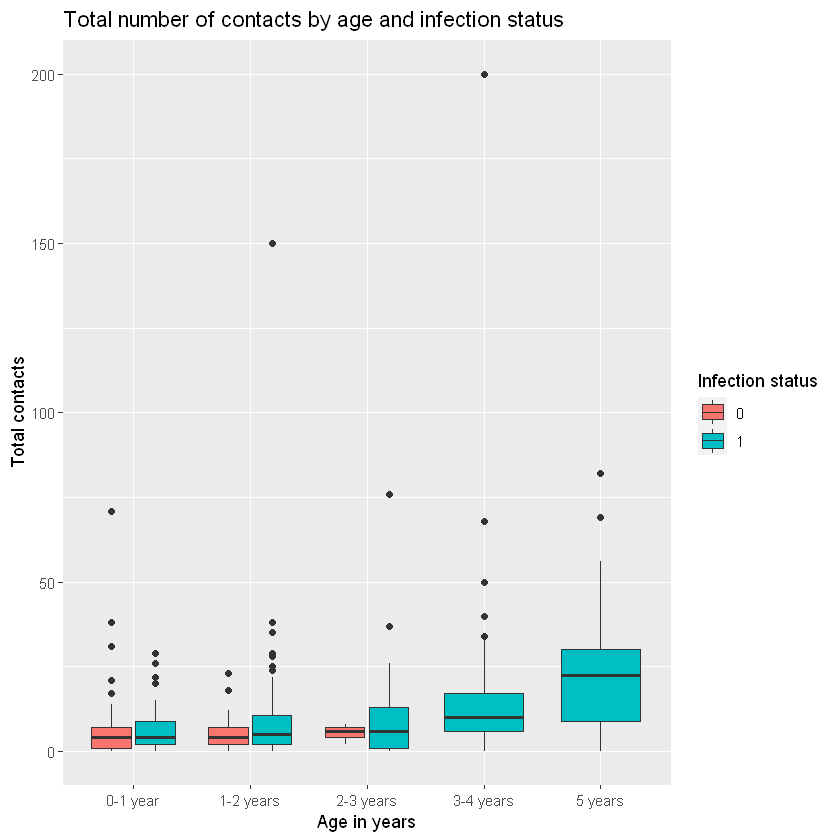

In [19]:
#png("boxplot_contacts_by_age.png")
rsv.data %>% filter(complete.cases(contacttotal)) %>% 
group_by(age_years) %>% 
ggplot(aes(x=age_years,y=contacttotal,fill=factor(infection)))+geom_boxplot()+
labs(title="Total number of contacts by age and infection status",
        x ="Age in years", y = "Total contacts", fill = "Infection status") 
#+ ylim(0, 100)
#dev.off()

In [13]:
#number of contacts per age group in infected children
summ_contact <- rsv.data %>% 
filter(infection == 1)%>%
filter(complete.cases(contacttotal)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contacttotal),
                  median = median(contacttotal),
                  sd = sd(contacttotal),
                  min = min(contacttotal),
                  max = max(contacttotal))
summ_contact

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-1 year,6.016129,4.0,6.323238,0,29
1-2 years,9.347368,5.0,16.588107,0,150
2-3 years,9.289855,6.0,11.530141,0,76
3-4 years,17.094340,10.0,28.466082,0,200
5 years,23.375000,22.5,19.636031,0,82


In [14]:
#number of contacts per age group in uninfected children
summ_contact <- rsv.data %>% 
filter(infection == 0)%>%
filter(complete.cases(contacttotal)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contacttotal),
                  median = median(contacttotal),
                  sd = sd(contacttotal),
                  min = min(contacttotal),
                  max = max(contacttotal))
summ_contact

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-1 year,5.031111,4,6.571306,0,71
1-2 years,5.589744,4,4.859705,0,23
2-3 years,5.333333,6,3.055050,2,8


***Contacts aged 0-4 years***

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 178 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 178 rows containing missing values (geom_point)."


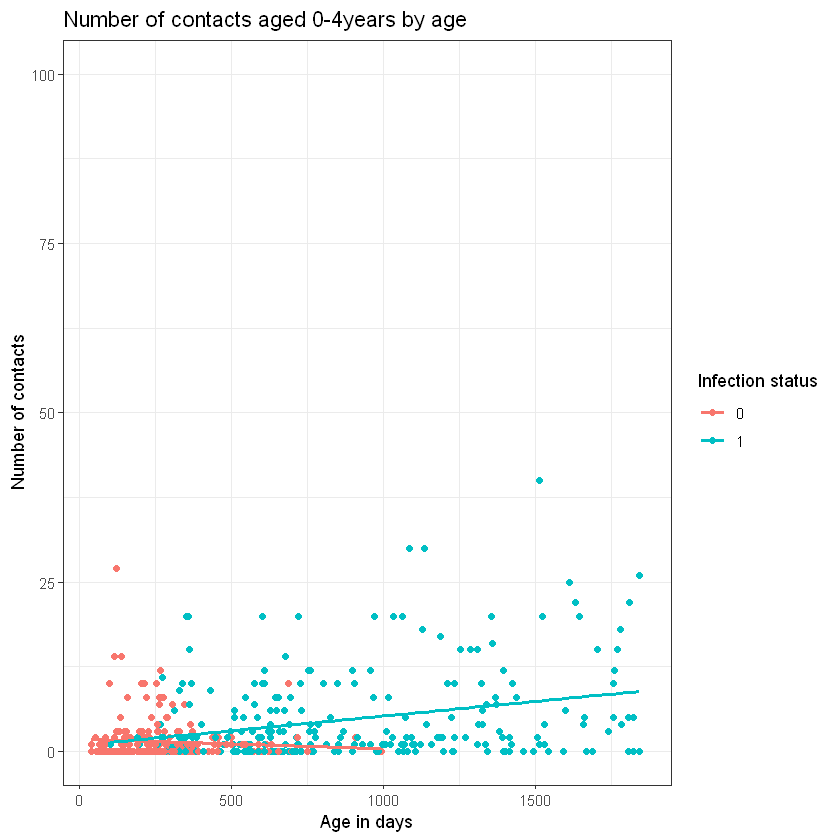

In [15]:
#png("contacts_0-4_by_age.png")
rsv.data %>% 
  ggplot(aes(x = age_days, y = contact04, color = factor(infection))) + 
  geom_point() +
  geom_smooth(method = lm, se = F) +
  theme_bw() +
  ylim (0, 100) +
labs(title="Number of contacts aged 0-4years by age",
        x ="Age in days", y = "Number of contacts", color = "Infection status") 
#dev.off()

In [16]:
summ_contact04 <- rsv.data %>% 
filter(complete.cases(contact04)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contact04),
                  median = median(contact04),
                  sd = sd(contact04),
                  min = min(contact04),
                  max = max(contact04))
summ_contact04

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-1 year,1.799197,0.0,3.627827,0,27
1-2 years,2.586777,1.0,3.940536,0,20
2-3 years,4.303571,1.5,6.361588,0,30
3-4 years,5.956522,2.5,6.886239,0,30
5 years,9.062500,5.0,10.251475,0,40


In [13]:
write.csv(summ_contact04, "contacts_04_by_age.csv", row.names = FALSE)

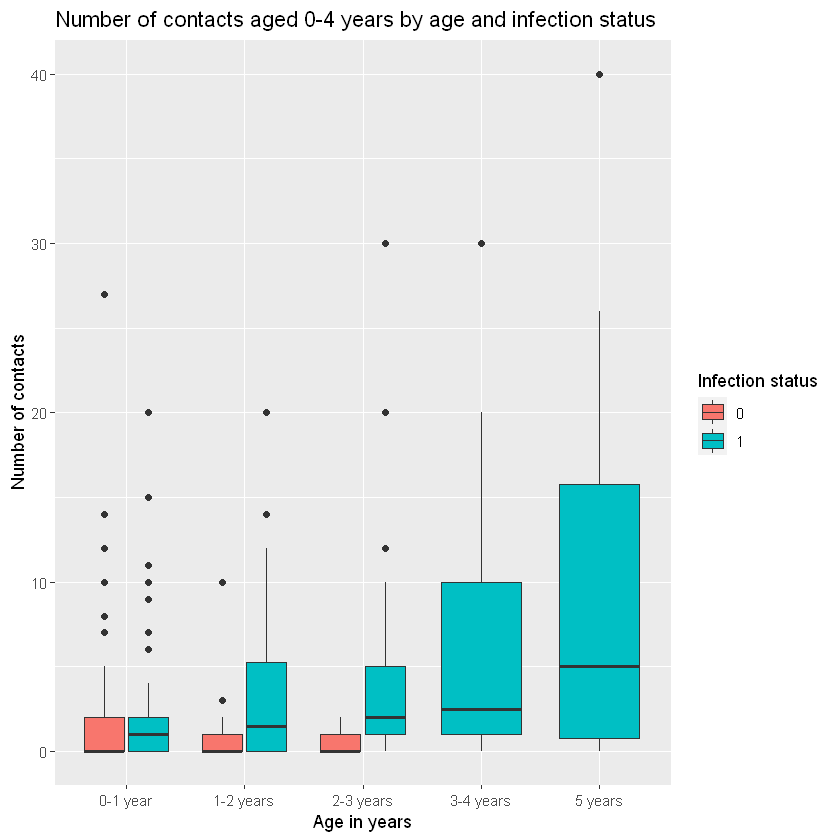

In [16]:
#png("boxplot_contacts_04_by_age.png")
rsv.data %>% filter(complete.cases(contact04)) %>% 
group_by(age_years) %>% 
ggplot(aes(x=age_years,y=contact04,fill=factor(infection)))+geom_boxplot()+
labs(title="Number of contacts aged 0-4 years by age and infection status",
        x ="Age in years", y = "Number of contacts", fill = "Infection status") 
#dev.off()

In [18]:
#contacts 0-4 years in infected children
summ_contact04 <- rsv.data %>% 
filter(infection == 1)%>%
filter(complete.cases(contact04)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contact04),
                  median = median(contact04),
                  sd = sd(contact04),
                  min = min(contact04),
                  max = max(contact04))
summ_contact04

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-1 year,2.571429,1.0,4.693737,0,20
1-2 years,3.333333,1.5,4.394228,0,20
2-3 years,4.509434,2.0,6.476652,0,30
3-4 years,5.956522,2.5,6.886239,0,30
5 years,9.062500,5.0,10.251475,0,40


In [19]:
#contacts 0-4 years in uninfected children
summ_contact04 <- rsv.data %>% 
filter(infection == 0)%>%
filter(complete.cases(contact04)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contact04),
                  median = median(contact04),
                  sd = sd(contact04),
                  min = min(contact04),
                  max = max(contact04))
summ_contact04

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-1 year,1.5751295,0,3.234869,0,27
1-2 years,0.8918919,0,1.728580,0,10
2-3 years,0.6666667,0,1.154701,0,2


***Contacts aged 5-9 years***

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 178 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 178 rows containing missing values (geom_point)."


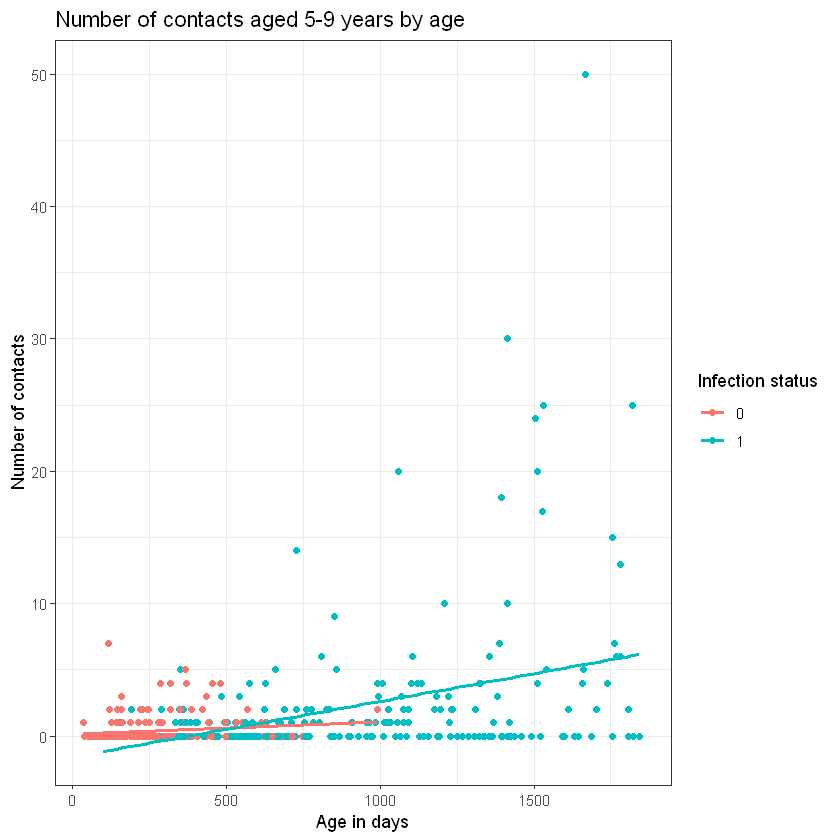

In [20]:
#png("contacts_59_by_age.png")
rsv.data %>% 
  ggplot(aes(x = age_days, y = contact59, color = factor(infection))) + 
  geom_point() +
  geom_smooth(method = lm, se = F) +
  theme_bw() +
labs(title="Number of contacts aged 5-9 years by age",
        x ="Age in days", y = "Number of contacts", color = "Infection status") 
#dev.off()

In [21]:
summ_contact59 <- rsv.data %>% 
filter(complete.cases(contact59)) %>% 
group_by(age_years) %>% 
  summarise(mean = mean(contact59),
                  median = median(contact59),
                  sd = sd(contact59),
                  min = min(contact59),
                  max = max(contact59))
summ_contact59

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-1 year,0.2851406,0.0,0.8297761,0,7
1-2 years,0.7272727,0.0,1.6733201,0,14
2-3 years,1.5535714,1.0,3.0506014,0,20
3-4 years,2.8043478,0.5,5.4021377,0,30
5 years,7.3750000,3.0,11.2156285,0,50


In [26]:
write.csv(summ_contact59, "contacts_59_by_age.csv", row.names = FALSE)

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."


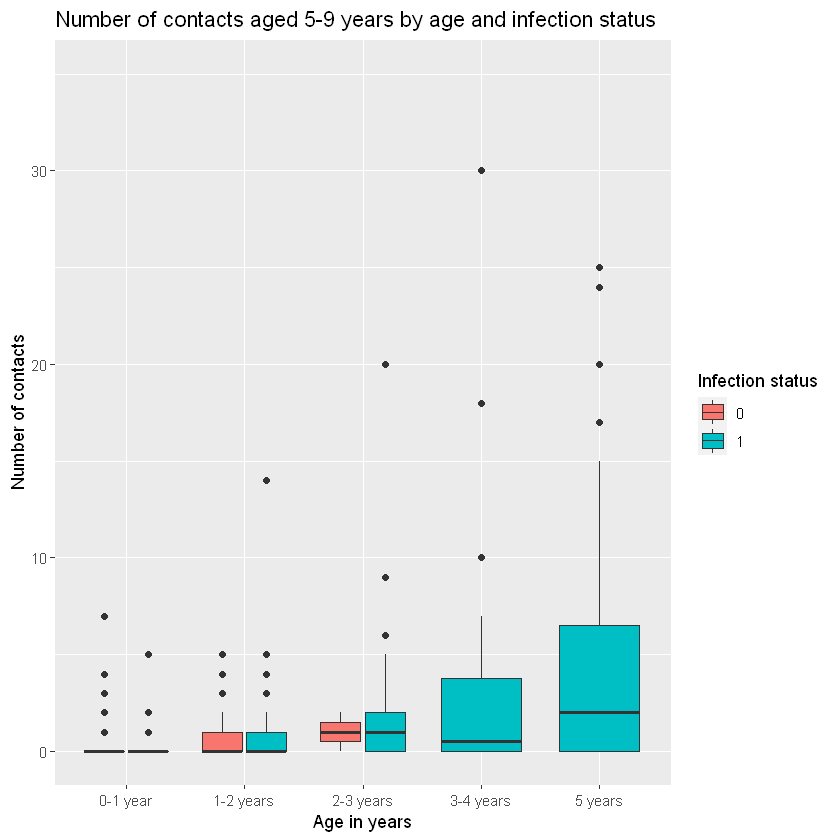

In [30]:
#png("boxplot_contacts_59_by_age.png")
rsv.data %>% filter(complete.cases(contact59)) %>% 
group_by(age_years) %>% 
ggplot(aes(x=age_years, y=contact59, fill=factor(infection))) + geom_boxplot()+
labs(title="Number of contacts aged 5-9 years by age and infection status",
        x ="Age in years", y = "Number of contacts", fill = "Infection status") + ylim(0, 35)
#dev.off()

In [22]:
#contacts aged 5-9 years among infected children
summ_contact59 <- rsv.data %>% 
filter(complete.cases(contact59)) %>% 
filter (infection == 1) %>%
group_by(age_years) %>% 
  summarise(mean = mean(contact59),
                  median = median(contact59),
                  sd = sd(contact59),
                  min = min(contact59),
                  max = max(contact59))
summ_contact59

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-1 year,0.2857143,0.0,0.8466895,0,5
1-2 years,0.6666667,0.0,1.7789487,0,14
2-3 years,1.5849057,1.0,3.1282458,0,20
3-4 years,2.8043478,0.5,5.4021377,0,30
5 years,7.3750000,3.0,11.2156285,0,50


In [23]:
#contacts aged 5-9 years among uninfected children
summ_contact59 <- rsv.data %>% 
filter(complete.cases(contact59)) %>% 
filter (infection == 0) %>%
group_by(age_years) %>% 
  summarise(mean = mean(contact59),
                  median = median(contact59),
                  sd = sd(contact59),
                  min = min(contact59),
                  max = max(contact59))
summ_contact59

age_years,mean,median,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-1 year,0.2849741,0,0.827038,0,7
1-2 years,0.8648649,0,1.417395,0,5
2-3 years,1.0000000,1,1.000000,0,2


**Proportion attending day care by age**

,values,daycare
,<chr>,<dbl>
0-1 year,0-1 year,0.3126761
1-2 years,1-2 years,0.4100719
2-3 years,2-3 years,0.6760563
3-4 years,3-4 years,0.8703704
5 years,5 years,0.1463415


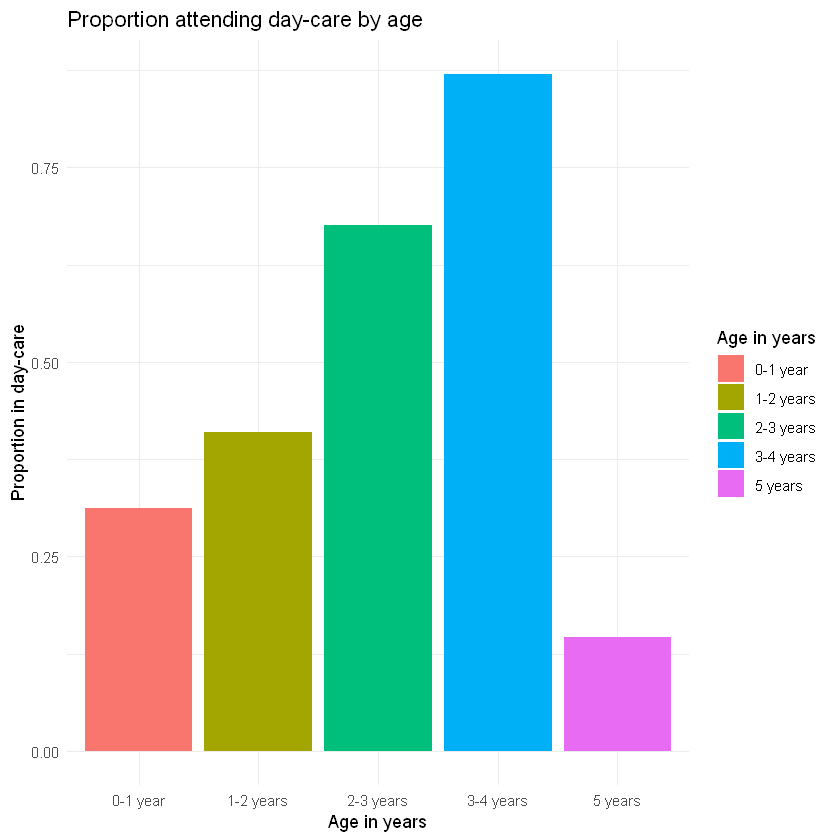

In [27]:
tab <- table(rsv.data$age_years, rsv.data$Nursery)
ptab <- prop.table(tab, margin=1)
dframe <- data.frame(values=rownames(tab), daycare=ptab[,2])
dframe
#png("daycare_by_age.png")
p<-ggplot(data=dframe, aes(x=values, y=daycare, fill = values)) +
  geom_bar(stat="identity")+
  theme_minimal()+
  labs(title="Proportion attending day-care by age",
        x ="Age in years", y = "Proportion in day-care") + scale_fill_discrete(name="Age in years")
p
#dev.off()

In [89]:
#Proportion infected attended daycare
infected <- subset(rsv.data, infection == 1)
tab <- table(infected$age_years, infected$Nursery)
ptab <- prop.table(tab, margin=1)
dframe <- data.frame(values=rownames(tab), daycare=ptab[,2])
dframe

,values,daycare
,<chr>,<dbl>
0-1 year,0-1 year,0.5352113
1-2 years,1-2 years,0.4950495
2-3 years,2-3 years,0.6764706
3-4 years,3-4 years,0.8703704
5 years,5 years,0.1463415


In [90]:
inf <- c(TRUE,TRUE,TRUE,TRUE,TRUE)
dframe <-cbind(dframe, inf)
dframe

,values,daycare,inf
,<chr>,<dbl>,<lgl>
0-1 year,0-1 year,0.5352113,TRUE
1-2 years,1-2 years,0.4950495,TRUE
2-3 years,2-3 years,0.6764706,TRUE
3-4 years,3-4 years,0.8703704,TRUE
5 years,5 years,0.1463415,TRUE


In [91]:
#Proportion uninfected attended daycare
infected <- subset(rsv.data, infection == 0)
tab <- table(infected$age_years, infected$Nursery)
ptab <- prop.table(tab, margin=1)
dframe1 <- data.frame(values=rownames(tab), daycare=ptab[,2])
dframe1

,values,daycare
,<chr>,<dbl>
0-1 year,0-1 year,0.2570423
1-2 years,1-2 years,0.1842105
2-3 years,2-3 years,0.6666667
3-4 years,3-4 years,NaN
5 years,5 years,NaN


In [92]:
for (d in seq_along(dframe1$values)){
    if (dframe1$daycare[d] == 'NaN'){
        dframe1$daycare[d] <- 0
        }
    }

In [93]:
inf <- c(FALSE,FALSE,FALSE,FALSE,FALSE)
dframe1 <-cbind(dframe1, inf)
dframe1

,values,daycare,inf
,<chr>,<dbl>,<lgl>
0-1 year,0-1 year,0.2570423,FALSE
1-2 years,1-2 years,0.1842105,FALSE
2-3 years,2-3 years,0.6666667,FALSE
3-4 years,3-4 years,0.0000000,FALSE
5 years,5 years,0.0000000,FALSE


In [94]:
dframe <-rbind(dframe, dframe1)
dframe

,values,daycare,inf
,<chr>,<dbl>,<lgl>
0-1 year,0-1 year,0.5352113,TRUE
1-2 years,1-2 years,0.4950495,TRUE
2-3 years,2-3 years,0.6764706,TRUE
3-4 years,3-4 years,0.8703704,TRUE
5 years,5 years,0.1463415,TRUE
0-1 year1,0-1 year,0.2570423,FALSE
1-2 years1,1-2 years,0.1842105,FALSE
2-3 years1,2-3 years,0.6666667,FALSE
3-4 years1,3-4 years,0.0000000,FALSE


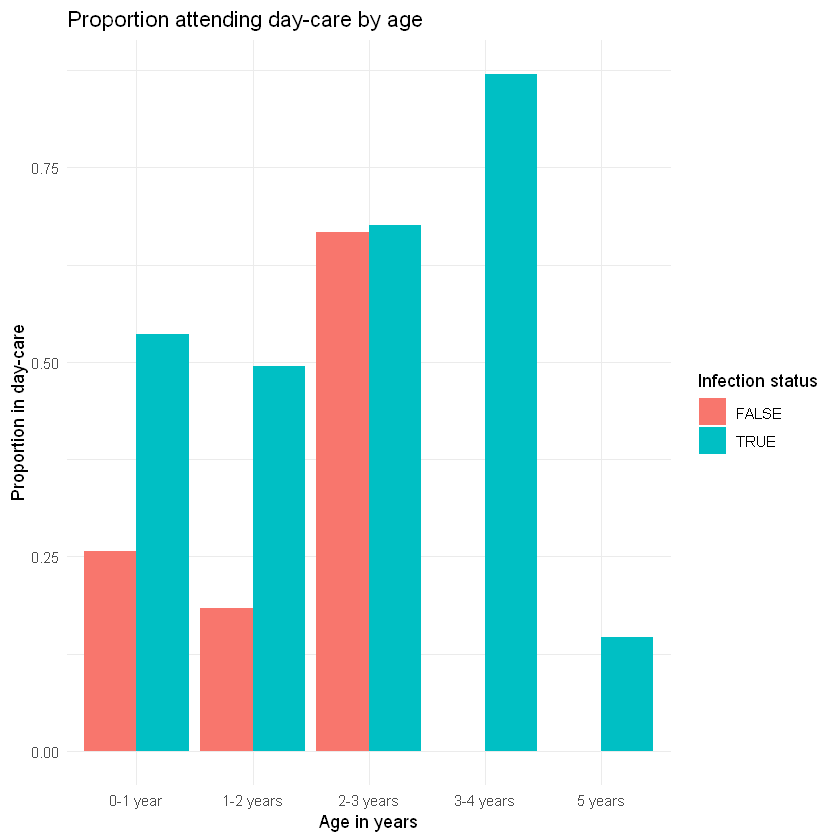

In [99]:
#png("daycare_by_age_and_infections.png")
p<-ggplot(data=dframe, aes(x=values, y=daycare, fill = factor(inf))) +
  geom_bar(position = 'dodge', stat="identity")+
  theme_minimal()+
  labs(title="Proportion attending day-care by age",
        x ="Age in years", y = "Proportion in day-care", fill = "Infection status") 
p
#dev.off()

**Correlation between daycare and contacts**

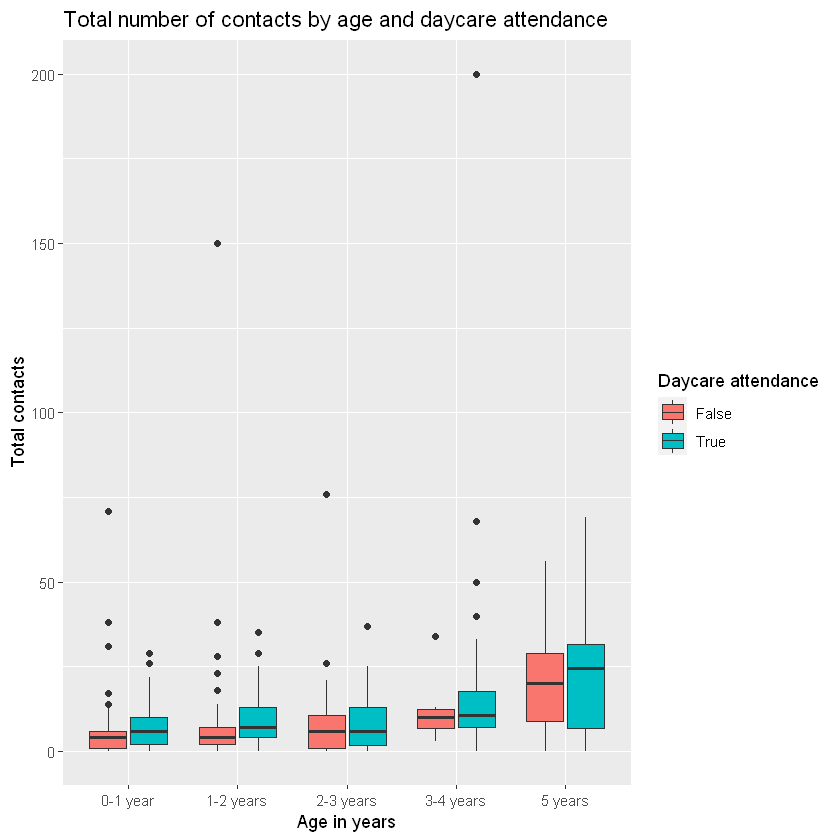

In [109]:
#png("boxplot_contacts_by_age_and_daycare.png")
rsv.data %>% filter(complete.cases(contacttotal)) %>% 
filter(complete.cases(Nursery))%>%
group_by(age_years) %>% 
ggplot(aes(x=age_years,y=contacttotal,fill=factor(Nursery)))+geom_boxplot()+
labs(title="Total number of contacts by age and daycare attendance",
        x ="Age in years", y = "Total contacts", fill = "Daycare attendance") 
#dev.off()

## 2006-2007 cohort ##

In [12]:
cohort_1 <- subset(rsv.data, cohort == '2006/2007')
head(cohort_1)

age_days,birthday,consultdate,infection,IgG_PreF,IgA_PreF,IgG_PostF,IgA_PostF,IgG_Ga,IgA_Ga,⋯,age_years,seasons,cohort,season_birth,nursery_house,pre_term,total_cont,total_cont04,total_cont59,age_at_consul
<dbl>,<date>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<chr>,<chr>,<dbl>
676,2004-04-01,2006-02-06,1,0.3565,0.60,9.3264,0.08,0.260000,0.01,⋯,1-2 years,2005/2006,2006/2007,Spring,False,NA,3-5,1-2,0,676
600,2004-07-23,2006-03-15,1,772.3431,33.15,473.5323,14.52,3.130699,0.02,⋯,1-2 years,2005/2006,2006/2007,Summer,False,NA,21-50,11-20,0,600
588,2004-08-09,2006-03-20,0,0.1800,0.03,0.2100,0.19,0.580000,0.03,⋯,1-2 years,2005/2006,2006/2007,Summer,False,NA,3-5,1-2,0,588
591,2004-08-06,2006-03-20,1,740.2907,70.38,466.2055,49.78,1.886910,0.05,⋯,1-2 years,2005/2006,2006/2007,Summer,False,NA,1-2,0,0,591
1184,2002-12-29,2006-03-27,1,1999.2353,NA,1459.5921,NA,55.896003,NA,⋯,3-4 years,2005/2006,2006/2007,Winter,False,NA,6-10,1-2,3-5,1184
686,2004-05-12,2006-03-29,1,807.2200,NA,838.7400,NA,15.000000,NA,⋯,1-2 years,2005/2006,2006/2007,Spring,False,NA,1-2,0,0,686


In [35]:
cohort_1 %$% table(age_years, useNA = "ifany")

age_years
 0-1 year 1-2 years 2-3 years 3-4 years   5 years 
      219        79        20        18        21 

In [36]:
cohort_1 %$% table(season_birth, useNA = "ifany")

season_birth
Autumn Spring Summer Winter 
    87     91     96     83 

In [37]:
cohort_1 %$% table(Siblings04, useNA = "ifany")

Siblings04
False  True  <NA> 
  169   169    19 

In [38]:
cohort_1 %$% table(Siblings59, useNA = "ifany")

Siblings59
False  True 
  262    95 

In [39]:
cohort_1 %$% table(Nursery, useNA = "ifany")

Nursery
False  True  <NA> 
  235   120     2 

In [40]:
cohort_1 %$% table(nursery_house, useNA = "ifany")

nursery_house
False  True  <NA> 
  236   117     4 

In [41]:
cohort_1 %$% table(pre_term, useNA = "ifany")

pre_term
False  True  <NA> 
    0     0   357 

In [42]:
cohort_1 %$% table(sex, useNA = "ifany")

sex
  1   2 
195 162 

In [43]:
cohort_1 %$% table(total_cont, useNA = "ifany")

total_cont
    0   1-2 11-20 21-50   3-5   50+  6-10  <NA> 
   16    45    37    19    72     1    73    94 

In [44]:
cohort_1 %$% table(total_cont04, useNA = "ifany")

total_cont04
    0   1-2 11-20 21-40   3-5  6-10  <NA> 
  107    83    13     2    31    27    94 

In [45]:
cohort_1 %$% table(total_cont59, useNA = "ifany")

total_cont59
    0   1-2 11-20 21-50   3-5  6-10  <NA> 
  190    49     4     1    15     4    94 

In [46]:
cohort_1 %$% table(infection, useNA = "ifany")

infection
  0   1 
189 168 

In [47]:
summary(cohort_1$age_days)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   36.0   192.0   316.0   470.1   608.0  1843.0 

## 2016-2017 cohort ##

In [13]:
cohort_2 <- subset(rsv.data, cohort == '2016/2017')
head(cohort_2)

age_days,birthday,consultdate,infection,IgG_PreF,IgA_PreF,IgG_PostF,IgA_PostF,IgG_Ga,IgA_Ga,⋯,age_years,seasons,cohort,season_birth,nursery_house,pre_term,total_cont,total_cont04,total_cont59,age_at_consul
<dbl>,<date>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<chr>,<chr>,<dbl>
713,2014-03-04,2016-02-15,0,0.1000,NA,1.93,NA,0.90,NA,⋯,1-2 years,2015/2016,2016/2017,Spring,False,False,0,0,0,713
1066,2013-03-16,2016-02-15,1,181.8966,1.37,731.38,5.35,1.94,0.51,⋯,2-3 years,2015/2016,2016/2017,Spring,False,False,0,0,0,1066
735,2014-03-19,2016-03-23,1,98.8800,0.36,101.20,0.59,0.31,0.02,⋯,2-3 years,2015/2016,2016/2017,Spring,NA,NA,NA,NA,NA,735
991,2013-07-25,2016-04-11,0,0.2600,0.02,0.94,0.08,0.23,0.02,⋯,2-3 years,2015/2016,2016/2017,Summer,False,False,1-2,0,1-2,991
1714,2011-08-04,2016-04-13,1,461.1900,8.14,156.17,4.32,6.66,7.22,⋯,5 years,2015/2016,2016/2017,Summer,False,False,0,NA,NA,1714
734,2014-05-15,2016-05-18,1,77.0200,0.54,281.68,1.35,0.80,0.14,⋯,2-3 years,2015/2016,2016/2017,Spring,False,NA,0,NA,NA,734


In [12]:
cohort_2 %$% table(age_years, useNA = "ifany")

age_years
 0-1 year 1-2 years 2-3 years 3-4 years   5 years 
      150        64        53        37        21 

In [13]:
cohort_2 %$% table(season_birth, useNA = "ifany")

season_birth
Autumn Spring Summer Winter 
    86     83     86     70 

In [15]:
cohort_2 %$% table(Siblings04, useNA = "ifany")

Siblings04
False  True  <NA> 
  198    85    42 

In [16]:
cohort_2 %$% table(Siblings59, useNA = "ifany")

Siblings59
False  True 
  240    85 

In [17]:
cohort_2 %$% table(Nursery, useNA = "ifany")

Nursery
False  True  <NA> 
  156   149    20 

In [18]:
cohort_2 %$% table(nursery_house, useNA = "ifany")

nursery_house
False  True  <NA> 
  229    70    26 

In [19]:
cohort_2 %$% table(pre_term, useNA = "ifany")

pre_term
False  True  <NA> 
  270    12    43 

In [20]:
cohort_2 %$% table(sex, useNA = "ifany")

sex
  1   2 
158 167 

In [21]:
cohort_2 %$% table(total_cont, useNA = "ifany")

total_cont
    0   1-2 11-20 21-50   3-5   50+  6-10  <NA> 
   68    43    44    28    65     9    66     2 

In [30]:
cohort_2 %$% table(total_cont04, useNA = "ifany")

total_cont04
    0   1-2 11-20 21-40   3-5  6-10  <NA> 
  106    60    19     6    26    24    84 

In [29]:
cohort_2 %$% table(total_cont59, useNA = "ifany")

total_cont59
    0   1-2 11-20 21-50   3-5  6-10  <NA> 
  162    47     3     4    18     7    84 

In [25]:
cohort_2 %$% table(infection, useNA = "ifany")

infection
  0   1 
148 177 

In [26]:
summary(cohort_2$age_days)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   37.0   230.0   486.0   612.3   932.0  1854.0 

## Compare the two cohorts ##

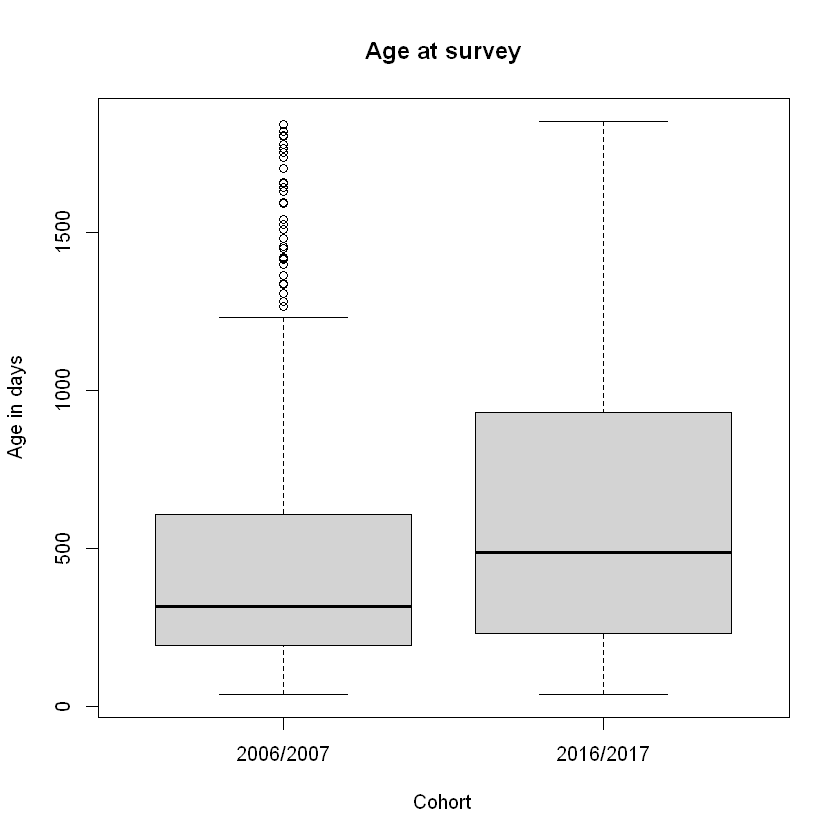

In [12]:
# PNG device
#png("age_at_survey_days.png")

# Code
boxplot(age_days ~ cohort, rsv.data,
       main = "Age at survey",
        xlab = "Cohort",
        ylab = "Age in days")

# Close device
#dev.off()

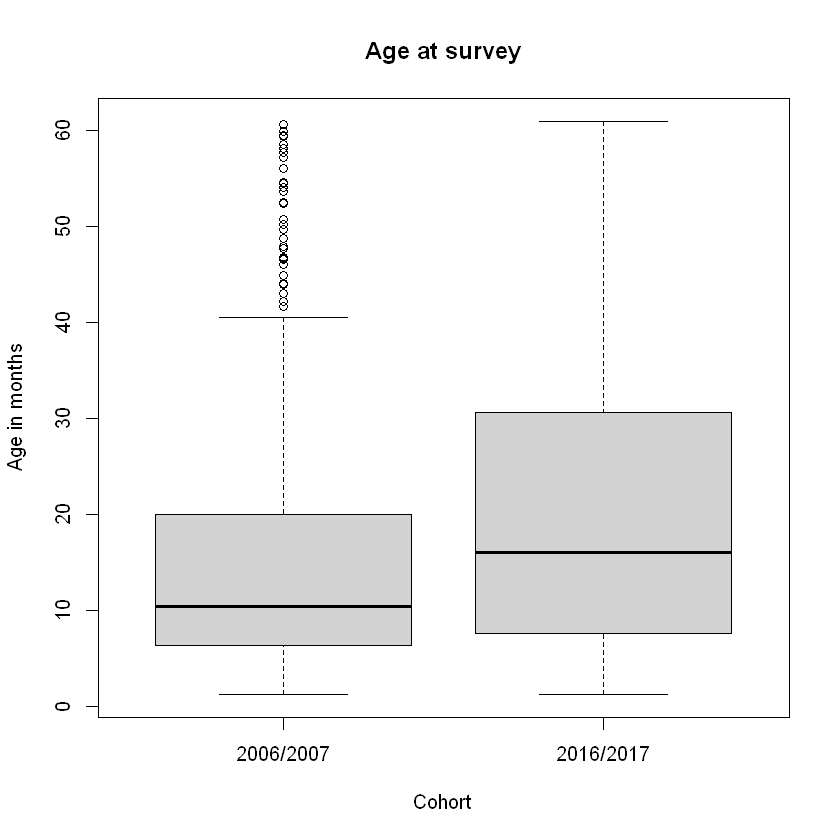

In [27]:
# PNG device
#png("age_at_survey_months.png")

# Code
boxplot(age_at_consul_mo ~ cohort, rsv.data,
       main = "Age at survey",
        xlab = "Cohort",
        ylab = "Age in months")

# Close device
#dev.off()

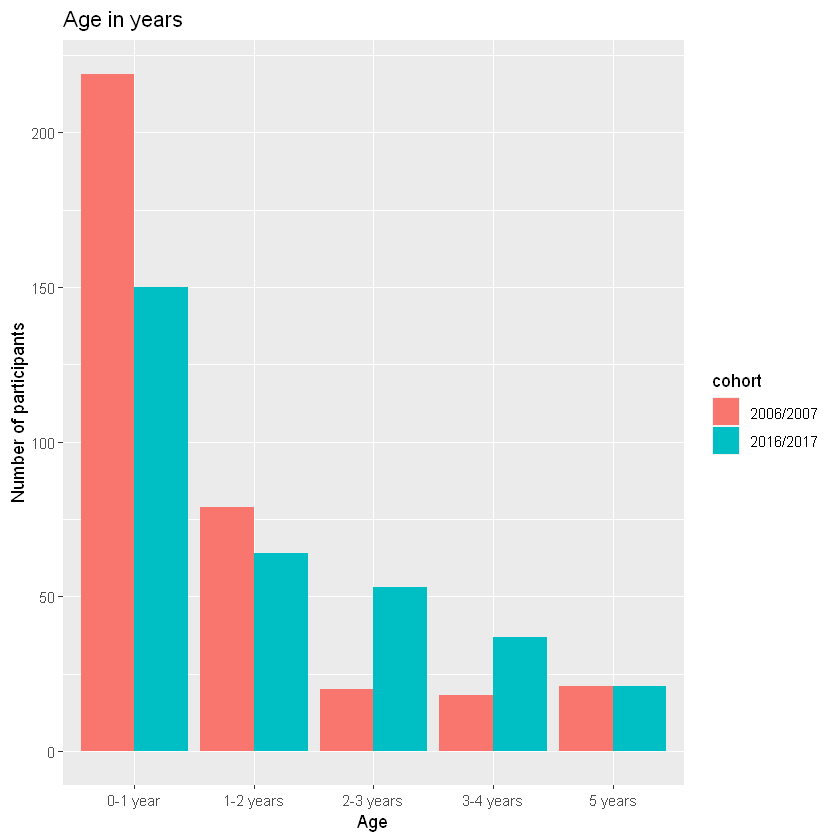

In [73]:
#png("age_years.png")
ggplot(rsv.data, aes(x = age_years, y = ..count.., fill=cohort)) + geom_bar(position="dodge") +
labs(title="Age in years",
        x ="Age", y = "Number of participants")
#dev.off()

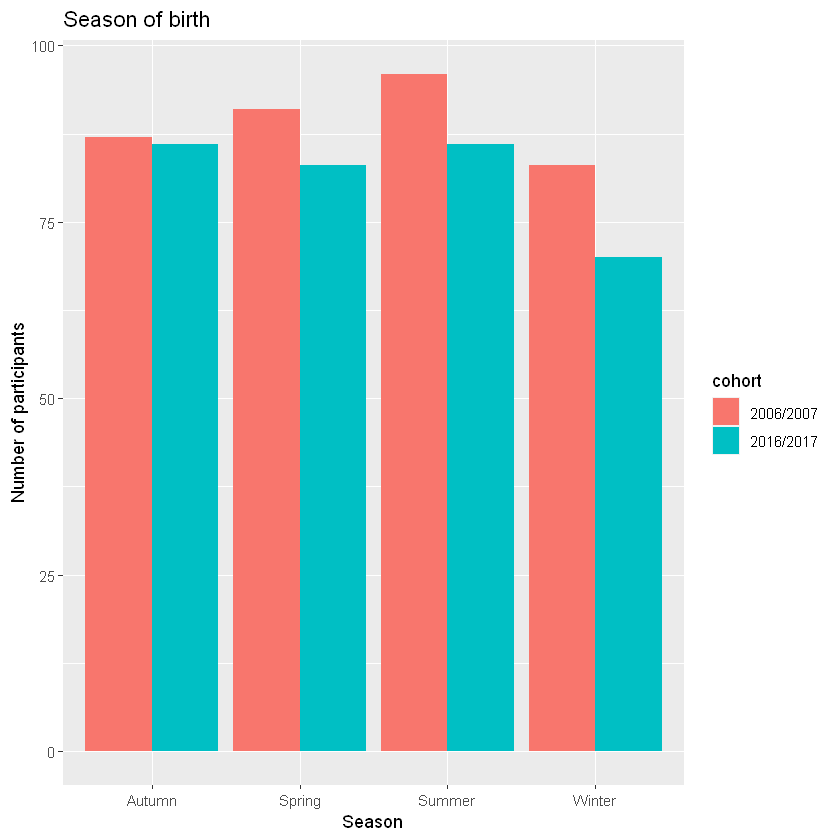

In [71]:
#png("season_birth.png")
ggplot(rsv.data, aes(season_birth, fill=cohort)) + geom_bar(position="dodge") +
labs(title="Season of birth",
        x ="Season", y = "Number of participants")
#dev.off()

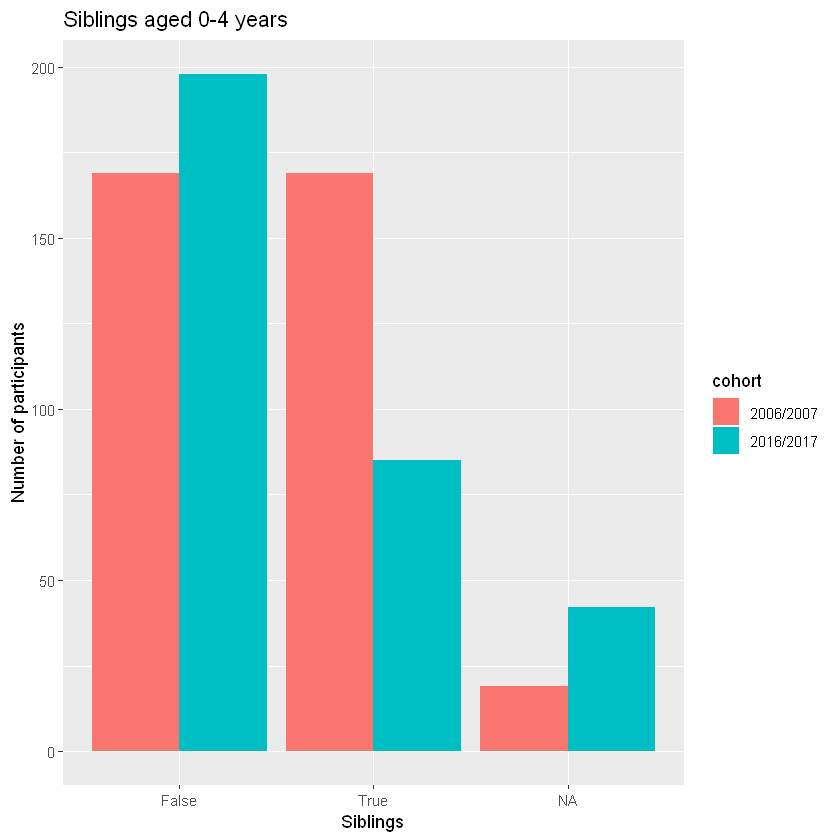

In [77]:
#png("siblings04.png")
ggplot(rsv.data, aes(Siblings04, fill=cohort)) + geom_bar(position="dodge") +
labs(title="Siblings aged 0-4 years",
        x ="Siblings", y = "Number of participants")
#dev.off()

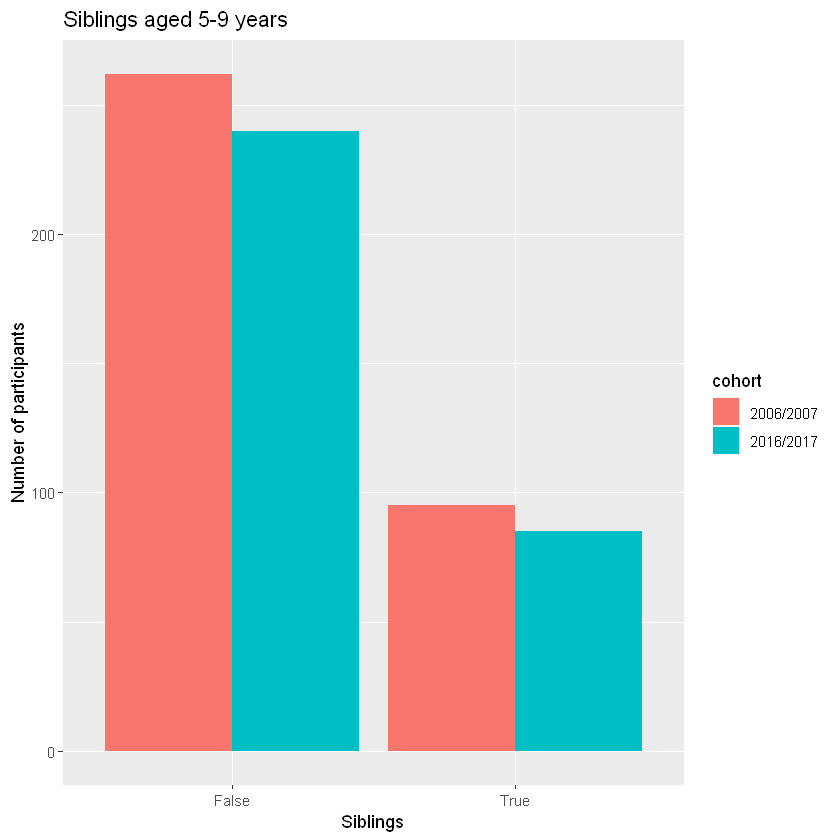

In [79]:
#png("siblings59.png")
ggplot(rsv.data, aes(Siblings59, fill=cohort)) + geom_bar(position="dodge") +
labs(title="Siblings aged 5-9 years",
        x ="Siblings", y = "Number of participants")
#dev.off()